# Public Transportation: Transjakarta

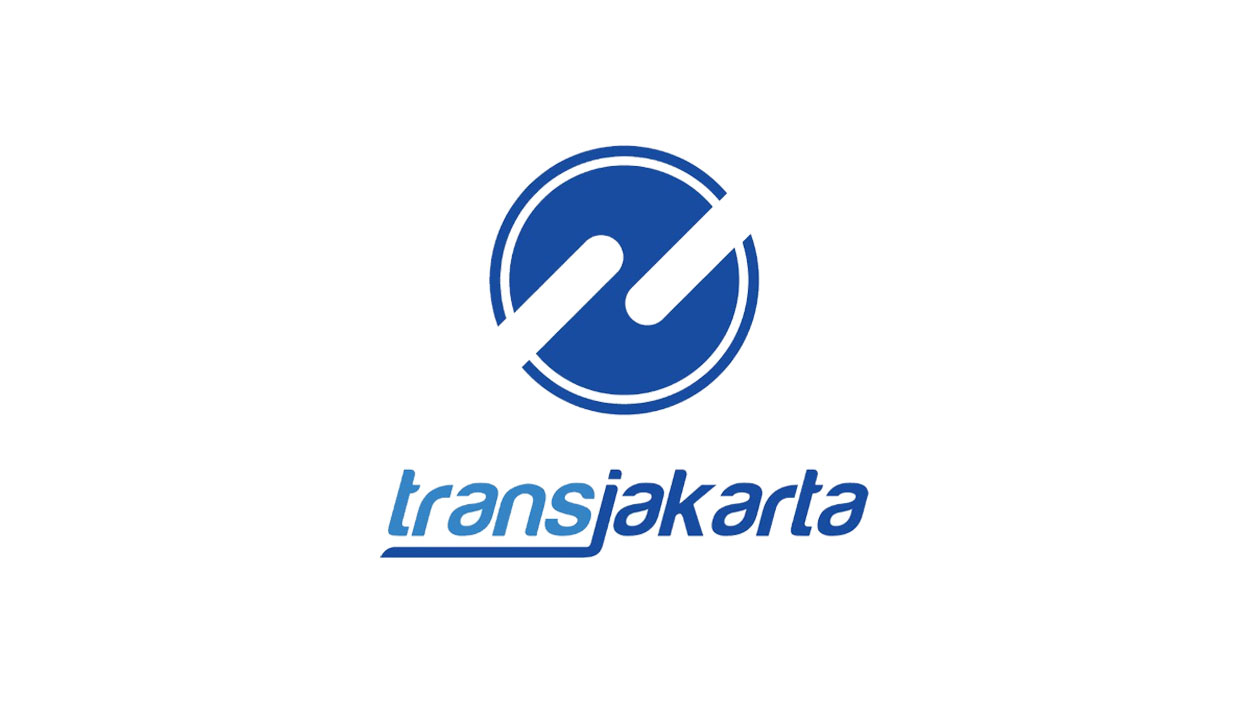

In today's urban landscape, efficient public transportation systems are vital for enhancing mobility, minimizing congestion, and fostering sustainable city development. This capstone project analyzes a dataset comprising public transportation tap-in and tap-out transactions from Transjakarta, aiming to provide actionable insights that can inform strategic business decisions and enhance customer experiences.


# **Overview of Public Transportation Tap-In and Tap-Out Transactions for TransJakarta**

## Background
TransJakarta is Jakarta's premier bus rapid transit (BRT) system, designed to provide efficient and reliable public transportation in the bustling capital city of Indonesia. Established in 2004, it has significantly expanded its network, offering a dedicated corridor system that alleviates traffic congestion and reduces travel times. In addition to the BRT services, TransJakarta has integrated Mikrotrans, smaller minibus services that cater to areas not directly served by the BRT, enhancing accessibility for commuters. The integrated transport system aims to streamline connections between various modes of public transportation, including commuter trains and other forms of public transit, thereby promoting seamless travel throughout Jakarta. This comprehensive approach not only addresses the city's mobility challenges but also encourages the use of public transport, contributing to more sustainable urban development.

## Problem Statements

1. **Route Utilization**: There isn’t enough information about where people get on and off the bus, which makes it hard to see which routes are busy and which are not. This can lead to overcrowding on popular routes while others are hardly used.

2. **Demographic Accessibility**: The service may not adequately cater to the diverse demographic profiles of passengers, potentially alienating certain groups due to unaddressed needs, for example based on age or gender.

3. **Service Reliability**: Insufficient data on tap-in and tap-out times makes it difficult to assess service punctuality and identify delays, negatively impacting customer satisfaction.

## Objectives:
1. **Understand Passenger Profiles**: Explore demographic information to understand who uses TransJakarta and how services can be improved for various groups.
2. **Identify High-Demand Routes**: Analyze transaction data to determine which routes and stops have the highest usage, allowing for better resource allocation.
3. **Improve Operational Efficiency**: Utilize data insights to enhance scheduling and minimize wait times, contributing to a more reliable service.

By addressing these issues, this project aims to provide actionable recommendations for enhancing TransJakarta's services, ultimately contributing to a more efficient and user-friendly public transportation system in Jakarta.


## Dataset Overview

The dataset, titled `Transjakarta.csv`, consists of various variables that capture essential aspects of each transaction. Understanding these variables is crucial for deriving meaningful insights:

### 1. Passenger Data
- **transID**: Unique transaction ID for each transaction.
- **payCardID**: Customer's main identifier; the card used for entry and exit.
- **payCardBank**: Name of the bank issuing the customer’s card.
- **payCardName**: Name of the customer as embedded on the card.
- **payCardSex**: Gender of the customer as indicated on the card.
- **payCardBirthDate**: Customer's birth year. 

### 2. Route
- **corridorID**: Corridor ID / Route ID serving as a key for grouping routes.
- **corridorName**: Name of the corridor / route containing the start and finish for each route. 
- **direction**: Indicates the direction of the route; 0 for "Go" (Right_place → Left_place) and 1 for "Back" (Left_place → Right_place).

### 3. Tap-In Details
- **tapInStops**: Tap-In (entrance) Stop ID used for identifying stop names.
- **tapInStopsName**: Names of the Tap-In (entrance) stops where customers tap in.
- **tapInStopsLat**: Latitude of Tap-In Stops.
- **tapInStopsLon**: Longitude of Tap-In Stops.
- **stopStartSeq**: Sequence of the stops (1st stop, 2nd stop, etc.), related to direction (the N-th starting stop to the ending stop from Right_address (direction: 0) or Left_address (direction: 1)).
- **tapInTime**: Date and time of tap-in.

### 4. Tap-Out Details
- **tapOutStops**: Tap-Out (exit) Stop ID used for identifying stop names.
- **tapOutStopsName**: Names of the Tap-Out (exit) stops where customers tap out.
- **tapOutStopsLat**: Latitude of Tap-Out Stops.
- **tapOutStopsLon**: Longitude of Tap-Out Stops.
- **stopEndSeq**: Sequence of the stops (1st stop, 2nd stop, etc.), related to direction (the N-th starting stop to the ending stop from Right_address (direction: 0) or Left_address (direction: 1)).
- **tapOutTime**: Date and time of tap-out.

### 5. Payment
- **payAmount**: Amount customers pay; some transactions may be free.


---------------

# **Data Preprocessing and Cleaning**

In [1]:
# Importing necessary libraries for data manipulation, analysis, and visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency

In [2]:
# Set display option to show all columns in DataFrames
pd.set_option('display.max_columns', None)

# Set the style of seaborn plots to 'darkgrid' for better visibility
sns.set_style("darkgrid")

In [3]:
# Import the Transjakarta data
df = pd.read_csv(r'Transjakarta.csv')
df.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,Pal Putih,-6.184631,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,Kemenkes 2,-6.228700,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,Gg. Kunir II,-6.133132,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,Taman Elok 1,-6.195743,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,Sunter Boulevard Barat,-6.149650,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


In [4]:
df['corridorID'].unique()

array(['5', '6C', 'R1A', '11D', '12', '1T', 'JAK.18', nan, 'B14', '1Q',
       '5M', 'M7B', '9A', '4', 'JAK.46', 'S22', '13', '9E', 'M9',
       'JAK.88', 'T11', 'JAK.16', '6V', '11Q', 'JAK.02', '11', '1C', '3B',
       'M1', '7E', '1P', '7D', '6H', '14', 'BW9', 'JIS3', '2', 'JAK.15',
       '6N', 'M11', 'JAK.112', '9N', 'JAK.43B', 'JAK.42', '7P', 'JAK.36',
       '13B', 'JAK.06', 'JAK.14', 'M7', 'T21', '12A', '9D', '1', '3A',
       '3C', 'M8', 'B21', 'JAK.71', 'JAK.77', 'M3', 'JAK.44', 'JAK.48B',
       '8K', 'JAK.19', 'M10', '10D', 'JAK.75', 'B11', 'JAK.52', 'JAK.37',
       'JAK.31', '11M', 'JAK.43C', '2F', '8C', 'M2', '12B', '5D',
       'JAK.117', '3H', 'JAK.49', '7A', '7Q', 'JAK.20', '1M', 'JAK.118',
       '5C', 'JAK.27', '6Q', '4E', 'JAK.13', 'JAK.84', '2H', 'JAK.08',
       '8E', 'JAK.23', '6M', 'JAK.07', 'JAK.22', 'JAK.115', 'JAK.21',
       'JAK.26', 'L13E', '12P', 'JAK.64', 'JAK.47', '1F', '12C', '13C',
       'JAK.01', 'JAK.120', '4B', '7C', 'JAK.85', '11N', 'JAK.10', '2E

**Replace the uncorrect corridorID**

In [5]:
df[df['corridorID']=='M7B']

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
11,IIEK980X1O23NZ,347204308990092,emoney,R.M. Labuh Laksmiwati,F,1984,M7B,BKN - Blok M,1.0,P00254,Tendean,-6.240213,106.83102,12,2023-04-03 06:22:10,P00129,Mampang Prapatan,-6.242699,106.82572,14.0,2023-04-03 06:50:21,NaN
169,IWEH403G6J82OS,30428250357040,bni,Estiawan Hastuti,M,2008,M7B,BKN - Blok M,1.0,B02114P,Lapangan Blok S,-6.237011,106.81421,6,2023-04-03 05:20:08,B00290P,Dammara,-6.254190,106.83146,18.0,2023-04-03 06:08:02,NaN
311,NRTT780I2X88BF,347204308990092,emoney,R.M. Labuh Laksmiwati,F,1984,M7B,BKN - Blok M,0.0,B01795P,Kalibata City 2,-6.255816,106.85237,7,2023-04-03 16:37:22,P00254,Tendean,-6.240213,106.83102,20.0,2023-04-03 18:36:21,NaN
469,ZDMN565Y7P06OK,30428250357040,bni,Estiawan Hastuti,M,2008,M7B,BKN - Blok M,0.0,P00177,PGC 1,-6.262494,106.86635,1,2023-04-03 17:29:10,B06577P,Blok M Jalur 2,-6.243369,106.80188,24.0,2023-04-03 19:00:37,NaN
611,SKAH640J9M53VV,347204308990092,emoney,R.M. Labuh Laksmiwati,F,1984,M7B,BKN - Blok M,1.0,P00254,Tendean,-6.240213,106.83102,12,2023-04-04 05:13:50,P00129,Mampang Prapatan,-6.242699,106.82572,14.0,2023-04-04 06:03:14,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37262,CNRB218H7Z49AS,4236399289828180970,brizzi,Eman Hutasoit,M,1956,M7B,BKN - Blok M,1.0,B03079P,Rawa Barat 1,-6.238813,106.81590,8,2023-04-19 09:08:31,B01825P,Kantor Pos Mampang,-6.240216,106.82259,10.0,2023-04-19 10:23:45,NaN
37308,BVMZ084V4D69KD,2614059373381201,dki,T. Bakidin Sihotang,F,1987,M7B,BKN - Blok M,1.0,P00254,Tendean,-6.240213,106.83102,12,2023-04-19 09:32:10,B05920P,Yayasan Mambaul Ula,-6.259350,106.86430,31.0,2023-04-19 10:04:26,NaN
37462,HBAX164L8J57XM,4236399289828180970,brizzi,Eman Hutasoit,M,1956,M7B,BKN - Blok M,0.0,P00254,Tendean,-6.240213,106.83102,20,2023-04-19 19:29:53,P00112,Kejaksaan Agung,-6.240500,106.79844,23.0,2023-04-19 20:58:14,NaN
37508,IXFT051X9U75IO,2614059373381201,dki,T. Bakidin Sihotang,F,1987,M7B,BKN - Blok M,0.0,B02062P,Komplek Polri Duren Tiga,-6.254242,106.83148,14,2023-04-19 17:37:25,B05802P,Transvision,-6.240036,106.82842,19.0,2023-04-19 19:18:35,NaN


In [6]:
df['corridorID'] = df['corridorID'].replace('M1H', '1H')
df['corridorID'] = df['corridorID'].replace('M7B', '7B')

---

In [7]:
# Save the initial column names for potential use in next analysis
initial_columns = df.columns

## Checking Duplicates

In [8]:
df.duplicated().sum()

0

## Checking Null Values

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-null  object 
 16  tapOutStopsName   36556 non-null  object

In [10]:
df.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID          1257
corridorName        1930
direction              0
tapInStops          1213
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64

-----------

## **Handling Null Values in `corridorID` and `corridorName`**

### **Statistical Testing: Chi-Squared Test for Independence on the `corridorID` and `corridorName`**

**Hypotheses**

- **Null Hypothesis (H0)**: There is no association between `corridorID` and `corridorName`. The two variables are independent of each other.

- **Alternative Hypothesis (Ha)**: There is an association between `corridorID` and `corridorName`. The two variables are not independent.


In [11]:
# Create a contingency table
contingency_table = pd.crosstab(df['corridorID'], df['corridorName'])

# Perform the Chi-Squared Test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Print results
print(f'P-value: {p_value}')

P-value: 0.0


**Interpretation of Results**
- Since the p-value (0.0) is less than the significance level of 0.05, we reject the null hypothesis (H0).  
- This result indicates that there is a statistically significant association between `corridorID` and `corridorName`.

### **Filling Null Values in `corridorID` and `corridorName` Based on `Matching Values in Each Other`**
1. `corridorID` is Null but, `corridorName` is available
2. `corridorName` is Null but, `corridorID` is available

In [12]:
corridor_combined_df = df[['corridorID', 'corridorName']].dropna().drop_duplicates()
mapping_corridor = tuple(zip(corridor_combined_df['corridorID'], corridor_combined_df['corridorName']))

# Condition 1: Fill NaN values in corridorID based on matching corridorName
def fill_corridor_id(row):
    if pd.isna(row['corridorID']):
        for corr_id, corr_name in mapping_corridor:
            if row['corridorName'] == corr_name:
                return corr_id
    else:
        return row['corridorID']

# Apply the function to fill NaN values in corridorID
df['corridorID'] = df.apply(fill_corridor_id, axis=1)

# Condition 2: Fill NaN values in corridorName based on matching corridorID
def fill_corridor_name(row):
    if pd.isna(row['corridorName']):
        for corr_id, corr_name in mapping_corridor:
            if row['corridorID'] == corr_id:
                return corr_name
    else:
        return row['corridorName']

# Apply the function to fill NaN values in corridorName
df['corridorName'] = df.apply(fill_corridor_name, axis=1)

----------

## **Handling Null Values in `tapInStops` and `tapInStopsName`**

### **Statistical Testing: Chi-Squared Test for Independence on `tapInStops` and `tapInStopsName`**

**Hypotheses for tapInStops-tapInStopsName**

- **Null Hypothesis (H0)**: There is no association between `tapInStops` and `tapInStopsName`. The two variables are independent of each other.

- **Alternative Hypothesis (Ha)**: There is an association between `tapInStops` and `tapInStopsName`. The two variables are not independent.


In [13]:
# Create a contingency table for tapInStops and tapInStopsName
contingency_table_tapIn = pd.crosstab(df['tapInStops'], df['tapInStopsName'])

# Perform the Chi-Squared Test
chi2_stat_tapIn, p_value_tapIn, dof_tapIn, expected_tapIn = chi2_contingency(contingency_table_tapIn)

# Print results
print(f'Tap In Stops - P-value: {p_value_tapIn}')

Tap In Stops - P-value: 0.0


>**Interpretation of Results**
>- Since the p-value (0.0) is less than the significance level of 0.05, we reject the null hypothesis (H0).  
>- This result indicates that there is a statistically significant association between `tapInStops` and `tapInStopsName`.

### **Statistical Testing: Chi-Squared Test for Independence on `tapOutStops` and `tapOutStopsName`**

**Hypotheses for tapOutStops-tapOutStopsName**

- **Null Hypothesis (H0)**: There is no association between `tapOutStops` and `tapOutStopsName`. The two variables are independent of each other.

- **Alternative Hypothesis (Ha)**: There is an association between `tapOutStops` and `tapOutStopsName`. The two variables are not independent.


In [14]:
# Create a contingency table for tapOutStops and tapOutStopsName
contingency_table_tapOut = pd.crosstab(df['tapOutStops'], df['tapOutStopsName'])

# Perform the Chi-Squared Test
chi2_stat_tapOut, p_value_tapOut, dof_tapOut, expected_tapOut = chi2_contingency(contingency_table_tapOut)

# Print results
print(f'Tap Out Stops - P-value: {p_value_tapOut}')

Tap Out Stops - P-value: 0.0


>**Interpretation of Results**
>- Since the p-value (0.0) is less than the significance level of 0.05, we reject the null hypothesis (H0).  
>- This result indicates that there is a statistically significant association between `tapOutStops` and `tapOutStopsName`.

----

### **Filling Null Values in `tapInStops`, `tapInStopsName`, `tapOutStops`, and `tapOutStopsName` Based on Matching Values**

1. When `tapInStopsName` is Null but `tapInStops` is available, the code fills `tapInStopsName` using the corresponding stop name that matches `tapInStops`.

2. When `tapOutStopsName` is Null but `tapOutStops` is available, the code fills `tapOutStopsName` using the corresponding stop name that matches `tapOutStops`.

3. When `tapInStops` is Null but `tapInStopsName` is available, the code fills `tapInStops` using the corresponding stop that matches `tapInStopsName`.

4. When `tapOutStops` is Null but `tapOutStopsName` is available, the code fills `tapOutStops` using the corresponding stop that matches `tapOutStopsName`.

In [15]:
# Combine tapIn and tapOut into one DataFrame and drop NaNs
tap_combined_df = pd.concat([
    df[['tapInStops', 'tapInStopsName']].rename(columns={'tapInStops': 'stop', 'tapInStopsName': 'stopName'}),
    df[['tapOutStops', 'tapOutStopsName']].rename(columns={'tapOutStops': 'stop', 'tapOutStopsName': 'stopName'})
]).dropna().drop_duplicates()

# Convert to a list of tuples with (stop, stopName)
mapping_tap = list(zip(tap_combined_df['stop'], tap_combined_df['stopName']))

# Define functions to fill NaN values in 'tapInStopsName' and 'tapOutStopsName'
def fill_stop_name(row, stop_col, stop_name_col, mapping):
    if pd.isna(row[stop_name_col]):
        for stop, stop_name in mapping:
            if row[stop_col] == stop:
                return stop_name
    else:
        return row[stop_name_col]

def fill_stop_id(row, stop_name_col, stop_col, mapping):
    if pd.isna(row[stop_col]):
        for stop, stop_name in mapping:
            if row[stop_name_col] == stop_name:
                return stop
    else:
        return row[stop_col]

# Apply the functions to fill NaN values
# Condition 1: Fill 'tapInStopsName' based on 'tapInStops' if 'tapInStopsName' is Null
df['tapInStopsName'] = df.apply(lambda row: fill_stop_name(row, 'tapInStops', 'tapInStopsName', mapping_tap), axis=1)

# Condition 2: Fill 'tapOutStopsName' based on 'tapOutStops' if 'tapOutStopsName' is Null
df['tapOutStopsName'] = df.apply(lambda row: fill_stop_name(row, 'tapOutStops', 'tapOutStopsName', mapping_tap), axis=1)

# Condition 3: Fill 'tapInStops' based on 'tapInStopsName' if 'tapInStops' is Null
df['tapInStops'] = df.apply(lambda row: fill_stop_id(row, 'tapInStopsName', 'tapInStops', mapping_tap), axis=1)

# Condition 4: Fill 'tapOutStops' based on 'tapOutStopsName' if 'tapOutStops' is Null
df['tapOutStops'] = df.apply(lambda row: fill_stop_id(row, 'tapOutStopsName', 'tapOutStops', mapping_tap), axis=1)

In [16]:
df.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID          1125
corridorName        1125
direction              0
tapInStops            22
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         1353
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64

--------------

## **Handling Null Values in `corridorID` and `corridorName` Based on `tapInStops-tapOutStops`**

### **Statistical Testing: Chi-Squared Test for Independence on `corridorID` and `tapInStops-tapOutStops`**

**Hypotheses for corridorID & tapInStops-tapOutStops**

- **Null Hypothesis (H0)**: There is no association between `corridorID` and `tapInStops-tapOutStops`. The two variables are independent of each other.

- **Alternative Hypothesis (Ha)**: There is an association between `corridorID` and `tapInStops-tapOutStops`. The two variables are not independent.


In [17]:
# Create a new DataFrame from the original one
df_analysis = df[['corridorID', 'corridorName', 'tapInStops', 'tapOutStops']].copy()

# Concatenate tapInStops and tapOutStops to create a new column
df_analysis['combinedStops'] = df_analysis['tapInStops']+ ' - ' + df_analysis['tapOutStops']

# Create a contingency table for corridorID and combinedStops
contingency_table = pd.crosstab(df_analysis['corridorID'], df_analysis['combinedStops'])

# Perform the Chi-Squared Test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print(f'corridorID - tapInStops&tapOutStops P-value: {p_value}')

corridorID - tapInStops&tapOutStops P-value: 0.0


>**Interpretation of Results**
>- Since the p-value (0.0) is less than the significance level of 0.05, we reject the null hypothesis (H0).  
>- This result indicates that there is a statistically significant association between `corridorID` and `tapInStops-tapOutStops`.

### **Statistical Testing: Chi-Squared Test for Independence on `corridorName` and `tapInStops-tapOutStops`**

**Hypotheses for corridorID & tapInStops-tapOutStops**

- **Null Hypothesis (H0)**: There is no association between `corridorName` and `tapInStops-tapOutStops`. The two variables are independent of each other.

- **Alternative Hypothesis (Ha)**: There is an association between `corridorName` and `tapInStops-tapOutStops`. The two variables are not independent.


In [18]:
# Create a contingency table for corridorID and combinedStops
contingency_table = pd.crosstab(df_analysis['corridorName'], df_analysis['combinedStops'])

# Perform the Chi-Squared Test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Print results
print(f'corridorName - tapInStops&tapOutStops P-value: {p_value}')

corridorName - tapInStops&tapOutStops P-value: 0.0


>**Interpretation of Results**
>- Since the p-value (0.0) is less than the significance level of 0.05, we reject the null hypothesis (H0).  
>- This result indicates that there is a statistically significant association between `corridorName` and `tapInStops-tapOutStops`.

---

### **Filling Null Values in `corridorID` and `corridorName` by Concatenating `tapInStops` and `tapOutStops`**

- In TransJakarta's operational framework:
  - Each corridor follows a specific route, with a consistent pattern of tap-in and tap-out stops.
  - This consistency allows us to use `tapInStops` and `tapOutStops` as unique identifiers for each corridor.
- By concatenating `tapInStops` and `tapOutStops`, we can:
  - Create a `keydict` that maps reliably to a unique combination of `corridorID` and `corridorName`.
  - Use this `keydict` to accurately fill in missing values based on the established stop patterns for each corridor.

In [19]:
df.isna().sum()[['corridorID','corridorName']]

corridorID      1125
corridorName    1125
dtype: int64

In [20]:
# Create a DataFrame for existing corridorID and corridorName
existing_corridors = df.dropna(subset=['corridorID', 'corridorName', 'tapInStops', 'tapOutStops'])

# Create a dictionary from existing corridorID and corridorName using concatenated tapInStops and tapOutStops as keys
corridor_dict1 = {
    f"{row['tapInStops']} - {row['tapOutStops']}": {
        'corridorID': row['corridorID'],
        'corridorName': row['corridorName']
    }
    for _, row in existing_corridors.iterrows()
}

# Define a function to fill in missing corridorID and corridorName
def fill_missing_corridor(row):
    key = f"{row['tapInStops']} - {row['tapOutStops']}"
    if pd.isna(row['corridorID']) and pd.isna(row['corridorName']):
        if key in corridor_dict1:
            return pd.Series([corridor_dict1[key]['corridorID'], corridor_dict1[key]['corridorName']])
    return pd.Series([row['corridorID'], row['corridorName']])

# Apply the function to fill missing values
df[['corridorID', 'corridorName']] = df.apply(fill_missing_corridor, axis=1)

In [21]:
df.isna().sum()[['corridorID','corridorName']]

corridorID      120
corridorName    120
dtype: int64

----------------

### **Handling Remaining Missing Values `corridorID` and `corridorName`**

In [22]:
# Display rows where both corridorID and corridorName are null to analyze potential patterns
# display(df[(df['corridorID'].isna())&(df['corridorName'].isna())])

**After analyzing the condition of null values in `corridorID` and `corridorName`, we can interpret two conditions that cause nulls**:

1. The `tapOutStops` feature is null.
2. Both `tapInStops` and `tapOutStops` are available, but there’s no match with the data that can extract the `corridorID` or `corridorName`.

In [23]:
# Create a DataFrame containing rows where both corridorID and corridorName are null, and the tapOutStops feature is also null (Condition 1).
condition_1_corr_stops = df[(df['corridorID'].isna())&(df['corridorName'].isna())&(df['tapOutStops'].isna())]
display(f'Total rows for condition 1: {len(condition_1_corr_stops)}')

# Create a DataFrame containing rows where both corridorID and corridorName are null, but both tapInStops and tapOutStops are available (Condition 2).
condition_2_corr_stops =df[(df['corridorID'].isna())&(df['corridorName'].isna())&(df['tapInStops'].notna())&(df['tapOutStops'].notna())]
display(f'Total rows for condition 2: {len(condition_2_corr_stops)}')

'Total rows for condition 1: 47'

'Total rows for condition 2: 73'

**As we can see, the total number of rows for `Condition 1` and `Condition 2` combined matches the total number of null values in `corridorID`/`corridorName`.**

**Since there are no correlating features for these null values, we can drop the rows with missing values associated with Condition 1 and Condition 2.**

In [24]:
df.dropna(axis=0,subset=['corridorID','corridorName'],inplace=True)
df.reset_index(drop=True, inplace=True)

-------------

### **Handling Remaining Missing Values `tapOutStops`,`tapOutStopsName`,`tapOutStopsLat`,`tapOutStopsLon`**

In [25]:
df.isna().sum()[['tapOutStops','tapOutStopsName','tapOutStopsLat','tapOutStopsLon']]

tapOutStops        1306
tapOutStopsName    1297
tapOutStopsLat     1297
tapOutStopsLon     1297
dtype: int64

**Analysis of Missing Values for `tapOutStops`**

1. There are no values in `tapOutStops` that match the corresponding values in `tapOutStopsName`.
2. There are rows where all of the following columns have null values: `tapOutStops`, `tapOutStopsName`, `tapOutStopsLat`, and `tapOutStopsLon`.

**Condition 1 may occur because the data entry personnel may have forgotten to input the `tapOutStops`.**

In [26]:
# Extract unique tapOutStopsName values where tapOutStops is null, but tapOutStopsName is not null
name_verify_null_out = df[(df['tapOutStops'].isna())&(df['tapOutStopsName'].notna())]['tapOutStopsName'].unique()

# Count the number of rows where tapOutStops is not null and tapOutStopsName matches any value in name_verify_null_out
count = df[(df['tapOutStops'].notna()) & (df['tapOutStopsName'].isin(name_verify_null_out))].shape[0]
display(f'Total Matching Values between non-null tapOutStops and corresponding tapOutStopsName: {count}')

# Display rows where tapOutStops is null but tapOutStopsName is not null, to further inspect these cases
cond_1_null_outstops = df[(df['tapOutStops'].isna()) & (df['tapOutStopsName'].notna())]
display(f'Total rows matching Condition 1 (where `tapOutStops` is null and `tapOutStopsName` is not null): {len(cond_1_null_outstops)}')
# display(cond_1_null_outstops)

'Total Matching Values between non-null tapOutStops and corresponding tapOutStopsName: 0'

'Total rows matching Condition 1 (where `tapOutStops` is null and `tapOutStopsName` is not null): 9'

**Condition 2 may occur because the passenger may have forgotten to tap out after exiting the TransJakarta.**

In [27]:
# Count rows where tapOutStops, tapOutStopsName, tapOutStopsLat, and tapOutStopsLon are all null
cond_2_null_outstops = df[
    df['tapOutStops'].isna() & 
    df['tapOutStopsName'].isna() & 
    df['tapOutStopsLat'].isna() & 
    df['tapOutStopsLon'].isna()
].shape[0]

# Display the total count of rows for Condition 2
display(f'Total Rows where tapOutStops, tapOutStopsName, tapOutStopsLat, and tapOutStopsLon \nare all null (Condition 2): {cond_2_null_outstops}')

'Total Rows where tapOutStops, tapOutStopsName, tapOutStopsLat, and tapOutStopsLon \nare all null (Condition 2): 1297'

In [28]:
# Display rows where all specified columns are null for further inspection
# display(cond_2_null_outstops)

non_tapOut = df[
    df['tapOutStops'].isna() & 
    df['tapOutStopsName'].isna() & 
    df['tapOutStopsLat'].isna() & 
    df['tapOutStopsLon'].isna()
]

**As we can see, the total number of null values for tapOutStops is equal to the total number of nulls found in Condition 1 and Condition 2 combined.**

In [29]:
df.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID             0
corridorName           0
direction              0
tapInStops            22
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         1306
tapOutStopsName     1297
tapOutStopsLat      1297
tapOutStopsLon      1297
stopEndSeq          1297
tapOutTime          1297
payAmount           1006
dtype: int64

**Since there are no correlating features for these null values, we can drop the rows with missing values associated with Condition 1 and Condition 2**

In [30]:
df.dropna(axis=0,subset=['tapInStops','tapOutStops'],inplace=True)
df.reset_index(drop=True, inplace=True)

**The missing values for `tapOutStopsLat`, `tapOutStopsLon`, `stopEndSeq`, and `tapOutTime` occur in the same rows.**

In [31]:
df.isna().sum()[['tapOutStops','tapOutStops','tapOutStopsName','tapOutStopsLat','tapOutStopsLon']]

tapOutStops        0
tapOutStops        0
tapOutStopsName    0
tapOutStopsLat     0
tapOutStopsLon     0
dtype: int64

----------

## **Categorizing Transportation Type Based on Routes from the TransJakarta Website**

In this section, we categorize various TransJakarta transportation routes into distinct types. This helps us identify the type of transportation based on route codes, as provided on the **[TransJakarta Routes](https://transjakarta.co.id/rute)**.

### Defining Route Lists by Category

Here are the different categories of transportation types based on their routes:

- **BRT (Bus Rapid Transit)**: Primary routes for buses operating in exclusive lanes.
- **Feeder Transportation**: Routes that connect local areas to the main BRT corridors.
- **Royaltrans**: Premium bus routes offering enhanced facilities.
- **Tour**: Special tour bus routes available for sightseeing.
- **Mikrotrans**: Smaller buses, also known as "angkot" or public minivans.
- **Flats**: Routes dedicated to transportation into public housing flats.
- **Transjabodetabek**: Routes connecting Jakarta to neighboring cities in Greater Jakarta.
- **AMARI**: Routes providing night transport services.

In [32]:
brt = [
    "1", "2", "2A", "3", "3F", "3H", "4", "4D", "5", "5C", "5D", 
    "6", "6A", "6B", "6V", "7", "7F", "8", "9", "9A", "9C", "9N", 
    "10", "10D", "10H", "11", "12", "13", "13B", "14", "L13E", "8A"
]

feeder = [
    "1A", "1B", "1C", "1E", "1F", "1H", "1M", "1N", "1P", "1Q", "1R", 
    "2B", "2P", "2Q", "3D", "3E", "4B", "4C", "4F", "4K", "5B", "5F", 
    "5M", "5N", "6C", "6D", "6H", "6K", "6M", "6N", "6Q", "6T", "6U", 
    "6W", "7A", "7B", "7C", "7D", "7E", "7P", "7Q", "7R", "7T", "7U", 
    "7V", "7W", "8C", "8D", "8E", "8K", "8M", "8N", "9D", "9E", "9H", 
    "11D", "11Q", "11W", "12A", "12B", "12P", "14A", "R1A","JIS3",
    "10K", "11K"
]

royaltrans = [
    "1K", "1T", "6P", "B13", "B14", "D31", "D32", 
    "S12", "S13", "S14", "S31", "T21"
]

tour = [
    "BW1", "BW2", "BW4", "BW9"
]

mikrotrans = [
    "JAK.01", "JAK.02", "JAK.03", "JAK.04", "JAK.05", "JAK.06", "JAK.07", "JAK.08", "JAK.09", 
    "JAK.10", "JAK.100", "JAK.102", "JAK.105", "JAK.106", "JAK.107", "JAK.108", "JAK.10A", 
    "JAK.10B", "JAK.11", "JAK.110A", "JAK.110B", "JAK.112", "JAK.113", "JAK.115", "JAK.117", 
    "JAK.118", "JAK.12", "JAK.120", "JAK.13", "JAK.14", "JAK.15", "JAK.16", "JAK.17", "JAK.18", 
    "JAK.19", "JAK.20", "JAK.21", "JAK.22", "JAK.23", "JAK.24", "JAK.25", "JAK.26", "JAK.27", 
    "JAK.28", "JAK.29", "JAK.30", "JAK.31", "JAK.32", "JAK.33", "JAK.34", "JAK.35", "JAK.36", 
    "JAK.37", "JAK.38", "JAK.39", "JAK.40", "JAK.41", "JAK.42", "JAK.43B", "JAK.43C", "JAK.44", 
    "JAK.45", "JAK.46", "JAK.47", "JAK.48A", "JAK.48B", "JAK.49", "JAK.50", "JAK.51", "JAK.52", 
    "JAK.53", "JAK.54", "JAK.56", "JAK.58", "JAK.59", "JAK.60", "JAK.61", "JAK.64", "JAK.71", 
    "JAK.72", "JAK.73", "JAK.74", "JAK.75", "JAK.76", "JAK.77", "JAK.78", "JAK.78A", "JAK.78B", 
    "JAK.80", "JAK.84", "JAK.85", "JAK.86", "JAK.87", "JAK.88", "JAK.89", "JAK.90", "JAK.93", 
    "JAK.95", "JAK.98", "JAK.99"
]

flats = [
    "2F", "2H", "3A", "3B", "3C", "4E", "9F", "10A", "10B", 
    "11B", "11C", "11M", "11P", "11R", "12C", "12F", "12H",
    "11N", "2E"
]

transjabodetabek = [
    "B11", "B21", "D11", "D21", "S11", "S21", "S22", "T11", "T12",
    "13C", "13D"
]

amari = [ 
    "M1", "M10", "M11", "M12", "M13", "M14", 
    "M2", "M3", "M4", "M5", "M6", "M7", "M8", "M9"
]

### Adding a 'Transtype' Column

To categorize transportation types based on the `corridorID`, the `categorize_transtype` function checks if the `corridorID` exists in predefined lists (such as `brt`, `feeder`, `royaltrans`, etc.) and returns the corresponding transportation type.


In [33]:
# Define a function to categorize the transit type
def categorize_transtype(corridor_id):
    if corridor_id in brt:
        return 'BRT'
    elif corridor_id in feeder:
        return 'Feeder Transportation'
    elif corridor_id in royaltrans:
        return 'Royaltrans'
    elif corridor_id in tour:
        return 'Tour'
    elif corridor_id in mikrotrans:
        return 'Mikrotrans'
    elif corridor_id in flats:
        return 'Flats'
    elif corridor_id in transjabodetabek:
        return 'Transjabodetabek'
    elif corridor_id in amari:
        return 'AMARI'

# Apply the function to create the new column 'Transtype'
df['Transtype'] = df['corridorID'].apply(categorize_transtype)

**Identifying Unassigned Corridor IDs**

In [34]:
df[df['Transtype'].isna()]['corridorID'].unique()

array([], dtype=object)

-------------

## **Handling Missing and Inconsistent `payAmount` Values**

### **Overview**
The `payAmount` column shows inconsistencies across different TransJakarta transportation types (`Transtype`), likely due to data entry errors. To ensure accurate fare analysis, we will standardize `payAmount` values to align with each transportation type.

### **Expected `payAmount` by Transportation Type**
Based on TransJakarta's fare structure:
- **Standard fare (3500 IDR)** applies to `BRT`, `AMARI`, `Flats`, `Feeder Transportation`, and `Transjabodetabek`.
- **Premium fare (20000 IDR)** applies exclusively to `Royaltrans`.
- **Free fare (0 IDR)** applies to `Mikrotrans` and `Tour`.


In [35]:
df.isna().sum()['payAmount']

968

`payAmount` column has **968** missing values

### **Value Counts by Transportation Type**
To better understand the inconsistencies, we grouped the data by `Transtype` and counted the occurrences of each `payAmount`:


In [36]:
df.groupby('Transtype')['payAmount'].value_counts().reset_index(name='count')

,Transtype,payAmount,count
0,AMARI,3500.0,1625
1,AMARI,0.0,1
2,BRT,3500.0,5579
3,Feeder Transportation,3500.0,8616
4,Feeder Transportation,0.0,142
5,Feeder Transportation,20000.0,2
6,Flats,0.0,2669
7,Flats,3500.0,137
8,Mikrotrans,0.0,12959
9,Mikrotrans,3500.0,4


### **Setting `payAmount` Values**
To standardize the `payAmount` values based on the `Transtype`, we defined a function that assigns the correct fare for each transportation type. The function works as follows:


In [37]:
def set_payamount(transtype):
    if transtype in ['BRT', 'Feeder Transportation', 'Flats', 'AMARI', 'Transjabodetabek']:
        return 3500
    elif transtype == 'Royaltrans':
        return 20000
    elif transtype in ['Tour', 'Mikrotrans']:
        return 0
    return None

# Apply the function to set payAmount for all rows
df['payAmount'] = df['Transtype'].apply(set_payamount)

In [38]:
df.isna().sum()['payAmount']

0

--------------

**Checking Incosistent Name of CorridorName**

In [39]:
corridor_combined_df = df[['corridorID', 'corridorName']].dropna().drop_duplicates()
# Create a dictionary to map corridor IDs to a list of names
corridor_dict = {}
for cid, name in zip(corridor_combined_df['corridorID'], corridor_combined_df['corridorName']):
    if cid in corridor_dict:
        corridor_dict[cid].append(name)
    else:
        corridor_dict[cid] = [name]

# Filter corridor IDs that have more than one associated name
multiple_values = {cid: names for cid, names in corridor_dict.items() if len(names) > 1}

# Display the corridor IDs with multiple names
print("Corridor IDs with more than one name:")
for cid, names in multiple_values.items():
    print(f"Corridor ID {cid}:")
    print("\n".join(names))
    print()

Corridor IDs with more than one name:
Corridor ID 7B:
BKN - Blok M
Kampung Rambutan - Blok M

Corridor ID 1H:
Tanah Abang - St. Gondangdia
Tanah Abang - Stasiun Gondangdia



Correct the name by comparing with the real route from the TransJakarta website:
- If the `corridorID` is `7B` and the `corridorName` is **Kampung Rambutan - Blok M**.
- If the `corridorID` is `1H` and the `corridorName` is **Tanah Abang - Stasiun Gondangdia**.

In [40]:
df.loc[df['corridorID'] == '7B', 'corridorName'] = 'Kampung Rambutan - Blok M'
df.loc[df['corridorID'] == '1H', 'corridorName'] = 'Tanah Abang - Stasiun Gondangdia'

--------------

## **Modifying the right data type**

In [41]:
df.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,Transtype
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,Pal Putih,-6.184631,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500,BRT
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,Kemenkes 2,-6.228700,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500,Feeder Transportation
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,Gg. Kunir II,-6.133132,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500,Feeder Transportation
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,Taman Elok 1,-6.195743,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500,Feeder Transportation
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,Sunter Boulevard Barat,-6.149650,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500,BRT


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36452 entries, 0 to 36451
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           36452 non-null  object 
 1   payCardID         36452 non-null  int64  
 2   payCardBank       36452 non-null  object 
 3   payCardName       36452 non-null  object 
 4   payCardSex        36452 non-null  object 
 5   payCardBirthDate  36452 non-null  int64  
 6   corridorID        36452 non-null  object 
 7   corridorName      36452 non-null  object 
 8   direction         36452 non-null  float64
 9   tapInStops        36452 non-null  object 
 10  tapInStopsName    36452 non-null  object 
 11  tapInStopsLat     36452 non-null  float64
 12  tapInStopsLon     36452 non-null  float64
 13  stopStartSeq      36452 non-null  int64  
 14  tapInTime         36452 non-null  object 
 15  tapOutStops       36452 non-null  object 
 16  tapOutStopsName   36452 non-null  object

**Effeciency Dtype**

In [43]:
df['direction'] = df['direction'].astype('int')
df['stopEndSeq'] = df['stopEndSeq'].astype('int')

**Time Series Variable**

In [44]:
df['tapInTime'] = pd.to_datetime(df['tapInTime'])
df['tapOutTime'] = pd.to_datetime(df['tapOutTime'])

----------

## **Creating and Transforming Column**

Calculates each passenger's age by subtracting their birth year (`payCardBirthDate`) from 2023 and stores the result in a new column called `Age`.

In [45]:
df['Age'] = 2023 - df['payCardBirthDate']

Extracts the hour from the `tapInTime` and `tapOutTime` columns to create new columns `tapInHour` and `tapOutHour`, and gets the day of the week from `tapInTime` to create a new column called `dayname`.

In [46]:
df['tapInHour'] = df['tapInTime'].dt.hour
df['tapOutHour'] = df['tapOutTime'].dt.hour
df['dayname'] = df['tapInTime'].dt.day_name()

Calculates the travel duration by subtracting `tapInTime` from `tapOutTime` and rounds the result to the nearest **minute**, storing it in a new column called `travelDuration`.

In [47]:
df['travelDuration'] = df['tapOutTime'] - df['tapInTime']
df['travelDuration'] = round(df['travelDuration'].dt.total_seconds()/60)

### **Categorizing Time of Day**

Categorizes the time of day based on the hour:
- **Morning**: 05:00 - 12:00
- **Afternoon**: 12:00 - 17:00
- **Evening**: 17:00 - 21:00
- **Night**: 21:00 - 05:00

In [48]:
def categorize_time(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

# Apply the function to create a new column
df['time_of_day'] = df['tapInTime'].dt.hour.apply(categorize_time)

### **Calculating Distance Traveled**

To enhance the dataset, we can calculate the distance traveled by each passenger between their tap-in and tap-out stops. We will use the Haversine formula, which calculates the distance between two points on the Earth's surface given their latitude and longitude.

#### **Haversine Formula**

**[The Haversine formula](https://en.wikipedia.org/wiki/Haversine_formula)** is given by:

$$
d = 2r \cdot \arcsin\left(\sqrt{\sin^2\left(\frac{\Delta \text{lat}}{2}\right) + \cos(\text{lat}_1) \cdot \cos(\text{lat}_2) \cdot \sin^2\left(\frac{\Delta \text{lon}}{2}\right)}\right)
$$

Description of the Formula:
- **d** is the distance between two points (along the surface of the sphere).
- **r** is the radius of the Earth (mean radius = 6,371 km).
- **lat<sub>1</sub>, lon<sub>1</sub>** are the coordinates of the first point (tap-in stop).
- **lat<sub>2</sub>, lon<sub>2</sub>** are the coordinates of the second point (tap-out stop).
- **Δlat** = lat<sub>2</sub> - lat<sub>1</sub>
- **Δlon** = lon<sub>2</sub> - lon<sub>1</sub>

In [49]:
def haversine(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    
    # Haversine Formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    
    # Radius of Earth in kilometers (change to 3956 for miles)
    r = 6371.0
    return round((r * c),2)

# Calculate distance traveled
df['distance_traveled_km'] = df.apply(
    lambda row: haversine(row['tapInStopsLat'], row['tapInStopsLon'], 
                           row['tapOutStopsLat'], row['tapOutStopsLon']), 
    axis=1
)

------------

### **Analysis of Non-Travel Transactions as Potential Outliers**

In [50]:
df[df['tapInStops'] == df['tapOutStops']].head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,Transtype,Age,tapInHour,tapOutHour,dayname,travelDuration,time_of_day,distance_traveled_km
12094,PTSV802P3N31HM,3533408904312159,dki,"R. Clara Yolanda, S.Pd",M,1966,7,Kampung Rambutan - Bidara Cina,1,P00015,Bidara Cina,-6.229724,106.86721,0,2023-04-03 19:29:56,P00015,Bidara Cina,-6.229724,106.86721,3,2023-04-03 21:14:38,3500,BRT,57,19,21,Monday,105.0,Evening,0.0
13065,NYWW602X9L69QW,3533408904312159,dki,"R. Clara Yolanda, S.Pd",M,1966,7,Kampung Rambutan - Bidara Cina,1,P00015,Bidara Cina,-6.229724,106.86721,0,2023-04-04 18:32:02,P00015,Bidara Cina,-6.229724,106.86721,3,2023-04-04 20:00:28,3500,BRT,57,18,20,Tuesday,88.0,Evening,0.0
14032,ZAEN407P2I91JE,3533408904312159,dki,"R. Clara Yolanda, S.Pd",M,1966,7,Kampung Rambutan - Bidara Cina,1,P00015,Bidara Cina,-6.229724,106.86721,0,2023-04-05 20:59:35,P00015,Bidara Cina,-6.229724,106.86721,3,2023-04-05 22:41:01,3500,BRT,57,20,22,Wednesday,101.0,Evening,0.0
14975,DDDG662W7P53NX,3533408904312159,dki,"R. Clara Yolanda, S.Pd",M,1966,7,Kampung Rambutan - Bidara Cina,1,P00015,Bidara Cina,-6.229724,106.86721,0,2023-04-06 17:35:40,P00015,Bidara Cina,-6.229724,106.86721,3,2023-04-06 18:43:02,3500,BRT,57,17,18,Thursday,67.0,Evening,0.0
15946,DGAJ724R1A02HM,3533408904312159,dki,"R. Clara Yolanda, S.Pd",M,1966,7,Kampung Rambutan - Bidara Cina,1,P00015,Bidara Cina,-6.229724,106.86721,0,2023-04-07 17:20:40,P00015,Bidara Cina,-6.229724,106.86721,3,2023-04-07 18:51:36,3500,BRT,57,17,18,Friday,91.0,Evening,0.0


In [51]:
min_duration_nontravel = df[df['tapInStops'] == df['tapOutStops']]['travelDuration'].min()
max_duration_nontravel = df[df['tapInStops'] == df['tapOutStops']]['travelDuration'].max()
mean_duration_nontravel = df[df['tapInStops'] == df['tapOutStops']]['travelDuration'].mean()

# Print the results for analysis
print(f"Minimum Duration for Non-Travel Transactions: {min_duration_nontravel} minutes")
print(f"Maximum Duration for Non-Travel Transactions: {max_duration_nontravel} minutes")
print(f"Mean Duration for Non-Travel Transactions: {mean_duration_nontravel} minutes")

Minimum Duration for Non-Travel Transactions: 51.0 minutes
Maximum Duration for Non-Travel Transactions: 116.0 minutes
Mean Duration for Non-Travel Transactions: 91.9 minutes


Based on the data above, there are several transactions where the tapInStops and tapOutStops are the same, indicating that passengers tapped in and out at **Bidara Cina station**. This scenario suggests that these passengers may not have completed a journey, as they remained at the same stop for durations ranging from 67 to 105 minutes. This pattern may imply either an error in their tap-in/tap-out actions or waiting too long at the station without actual travel.

Given these statistics, we can reasonably assume that these transactions represent outliers in typical transit activity.

**Contextual Understanding**:
In the context of public transportation, particularly for **TransJakarta**, a passenger tapping in and out at the same stop over such long durations is unusual. Typically, a brief tap-in/tap-out at the same stop might indicate an error, such as:
- A user deciding not to travel after initially tapping in.
- A technical issue with the card reader.

However, the durations here are considerably long, suggesting that passengers may be waiting. This extended wait time at the same location is atypical and likely does not represent genuine transit movement.

Since such non-travel events may skew the analysis of travel durations and frequency of stop usage, we consider them outliers and will remove them for a cleaner dataset. This decision will enhance the accuracy of our subsequent analyses, ensuring that we focus on meaningful transit activity.


In [52]:
# Define the non-travel threshold based on identical tapInStops and tapOutStops
non_travel_outliers = df[(df['tapInStops'] == df['tapOutStops'])]

# Drop the outliers from the main dataset
df_cleaned = df.drop(non_travel_outliers.index)

---

# **Exploratory Data Analysis**

## **Time-Series Analysis**

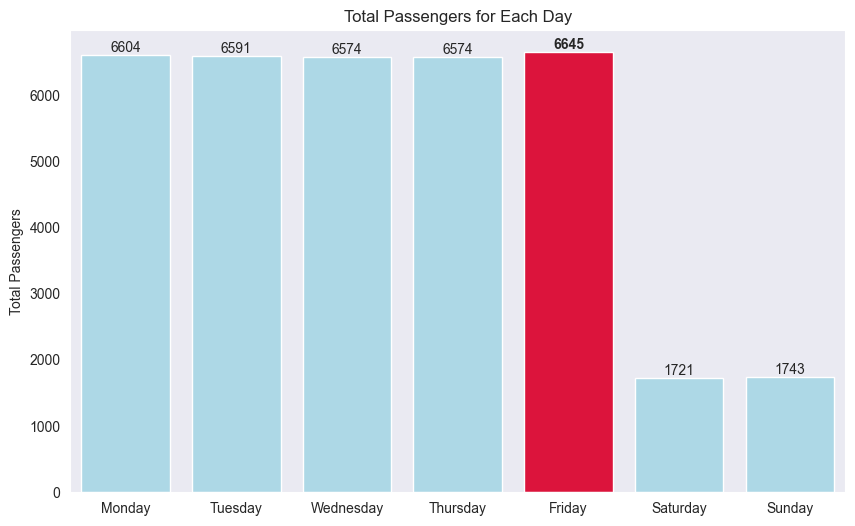

In [53]:
# Calculate sales count by weekday
weekday_count = df.groupby('dayname')['transID'].count().reset_index()
weekday_count.columns = ['dayname', 'transaction_count']

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_count['dayname'] = pd.Categorical(weekday_count['dayname'], categories=weekday_order, ordered=True)


# Plotting Bar plot with Seaborn
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(data=weekday_count, x='dayname', y='transaction_count', hue='dayname')

# Highlight the highest transaction count
max_count = weekday_count['transaction_count'].max()
for p in bar_plot.patches:
    if p.get_height() == max_count:
        p.set_facecolor('crimson')
        fontweight = 'heavy'
    else:
        p.set_facecolor('lightblue')
        fontweight = 'normal'
    
    bar_plot.annotate(
        format(int(p.get_height())), 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', va='bottom', fontweight=fontweight
    )

# Adding title and labels
plt.title('Total Passengers for Each Day')
plt.ylabel('Total Passengers')
plt.xlabel('')
plt.grid(axis='y')
plt.show()

>**Insights**
>- Passengers remain consistently high from Monday to Friday, with each weekday seeing over 6,500 passengers. This suggests a steady demand for TransJakarta services during the typical workweek.
>- Friday has the highest total of passengers (6,645), slightly surpassing the other weekdays. This may indicate increased travel activity as people prepare for the weekend.
>- There’s a significant drop in transactions on Saturday (1,721) and Sunday (1,743), showing that fewer people use TransJakarta on weekends. This drop could be due to reduced commuter travel as people stay home or use alternative transport options.

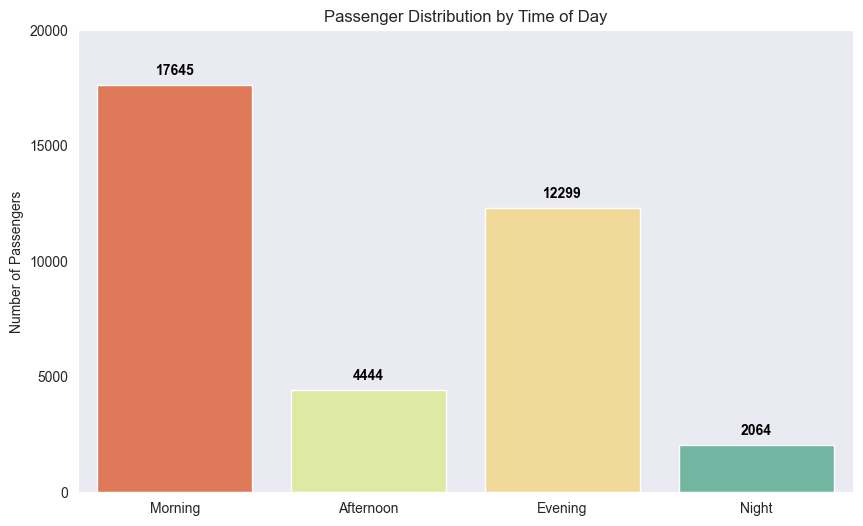

In [54]:
# Count the number of passengers for each time of day
passenger_distribution = df['time_of_day'].value_counts()

# Define the order of categories
time_of_day_order = ['Morning', 'Afternoon','Evening', 'Night']

# Create a bar plot with specified order
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=passenger_distribution.index, 
                 y=passenger_distribution.values,
                 hue=passenger_distribution.index,
                 palette='Spectral', 
                 order=time_of_day_order)

# Annotate the total number of passengers on each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                fontweight='heavy', color='black', 
                xytext=(0, 5),  # 5 points vertical offset
                textcoords='offset points')

plt.title('Passenger Distribution by Time of Day')
plt.xlabel('')
plt.ylabel('Number of Passengers')
ax.set_xticks(list(range(len(time_of_day_order))))
ax.set_xticklabels([label.capitalize() for label in time_of_day_order])
plt.yticks(np.arange(0, 20001, 5000))
plt.grid(axis='y') 
plt.show()

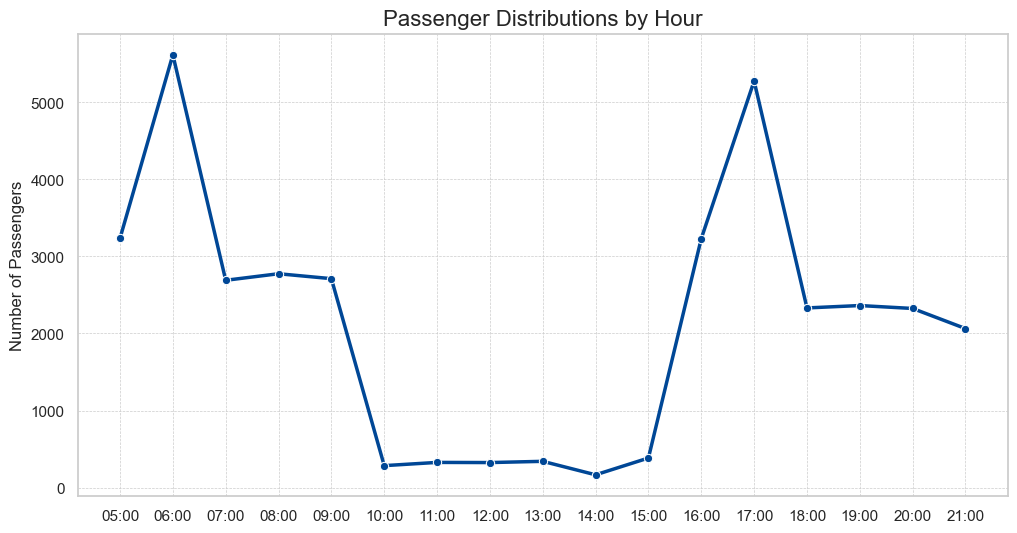

In [55]:
# Group by `tapInHour` and count the number of transactions per hour
hourly_counts = df.groupby('tapInHour').size().reset_index(name='passenger_count')

# Convert hour to a time format for better readability in the plot
hourly_counts['hour_formatted'] = hourly_counts['tapInHour'].apply(lambda x: f"{x:02d}:00")

# Set Seaborn style
sns.set(style="whitegrid")

# Plotting with Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=hourly_counts,
    x='hour_formatted',
    y='passenger_count',
    marker='o',
    color='#004796',
    linewidth=2.5
)


# Enhancing plot aesthetics
plt.title('Passenger Distributions by Hour', fontsize=16)
plt.xlabel('')
plt.ylabel('Number of Passengers')
plt.grid(True, linestyle='--', linewidth=0.5)

plt.show()

>**Insights**
>- The graph shows a clear spike in passengers around **6:00** and **17:00**, which aligns with rush hours as people commute to and from work.
>- Between **9:00** and **15:00**, there's a noticeable drop in passenger numbers, likely because most people are at work during these hours.
>- After **18:00**, the passenger count steadily declines, possibly due to reduced demand as people finish their evening commutes.


---

## **Correlation of Travel Duration vs Distance Traveled**

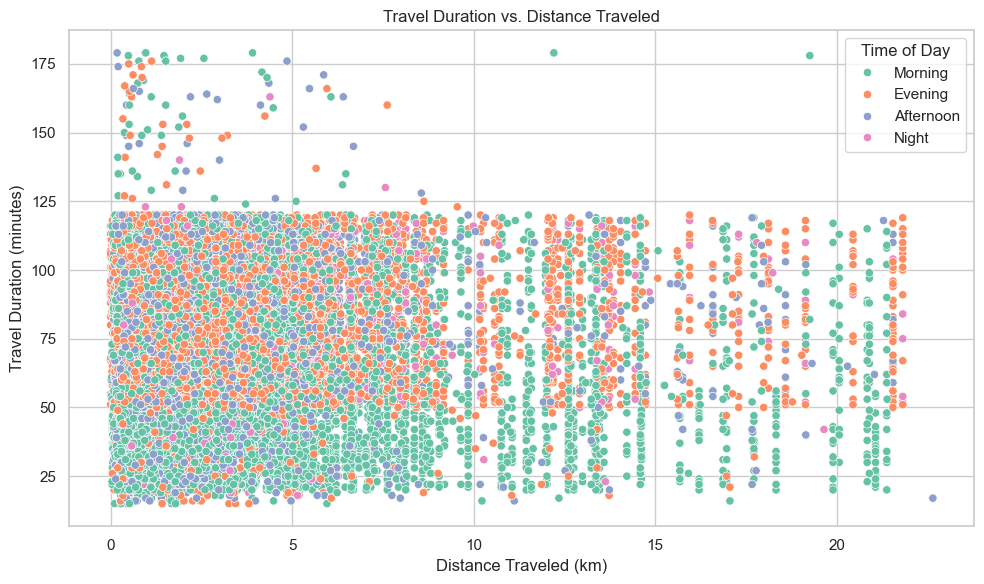

In [56]:
# Scatter plot: Travel Duration vs. Distance Traveled
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='distance_traveled_km', y='travelDuration', hue='time_of_day', palette='Set2')
plt.title('Travel Duration vs. Distance Traveled')
plt.xlabel('Distance Traveled (km)')
plt.ylabel('Travel Duration (minutes)')
plt.legend(title='Time of Day')
plt.tight_layout()
plt.show()

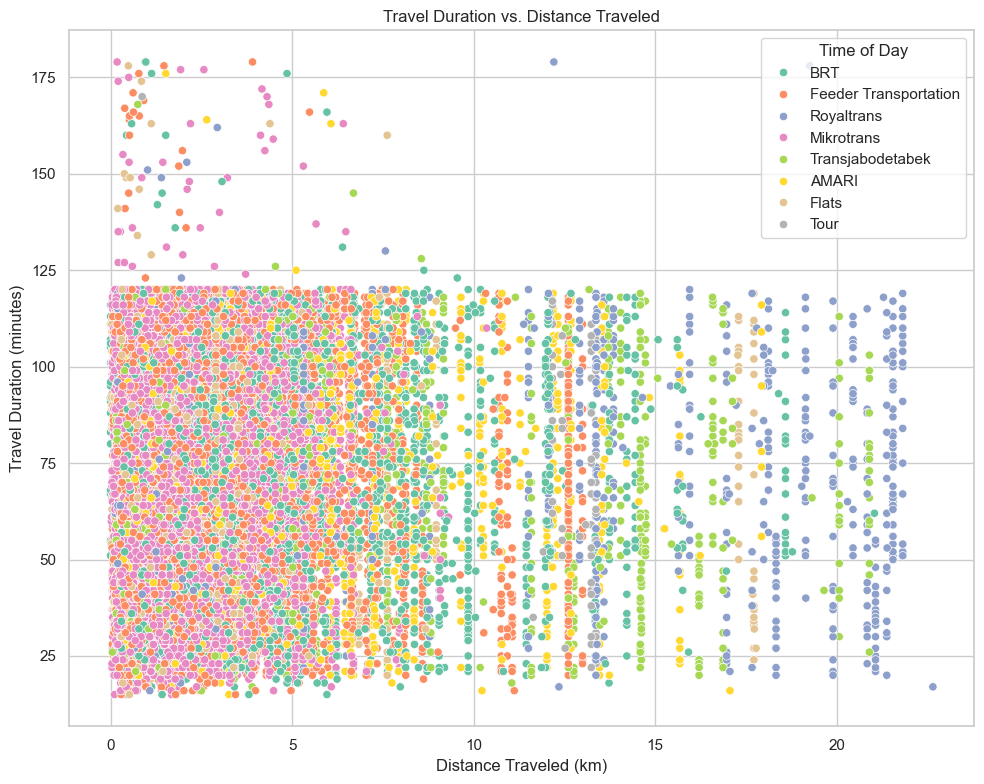

In [57]:
# Scatter plot: Travel Duration vs. Distance Traveled
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='distance_traveled_km', y='travelDuration', hue='Transtype', palette='Set2')
plt.title('Travel Duration vs. Distance Traveled')
plt.xlabel('Distance Traveled (km)')
plt.ylabel('Travel Duration (minutes)')
plt.legend(title='Time of Day')
plt.tight_layout()
plt.show()

>**Insights**
>- Both scatter plots indicate that **distance traveled does not always align with travel duration**. This may be due to external factors, such as traffic conditions.
>- **Royaltrans and Transjabodetabek services**, which cover longer distances than other transport types, show a similar range of travel duration compared to shorter-distance options. This suggests that these services maintain efficient travel times despite the longer routes.
>- By comparing the first scatter plot and the second one, we observe **increased travel durations in the morning and Afternoon** for non-BRT vehicles. This may be due to traffic congestion, as non-BRT vehicles do not have access to priority lanes.


---

## **Passenger Segmentation**

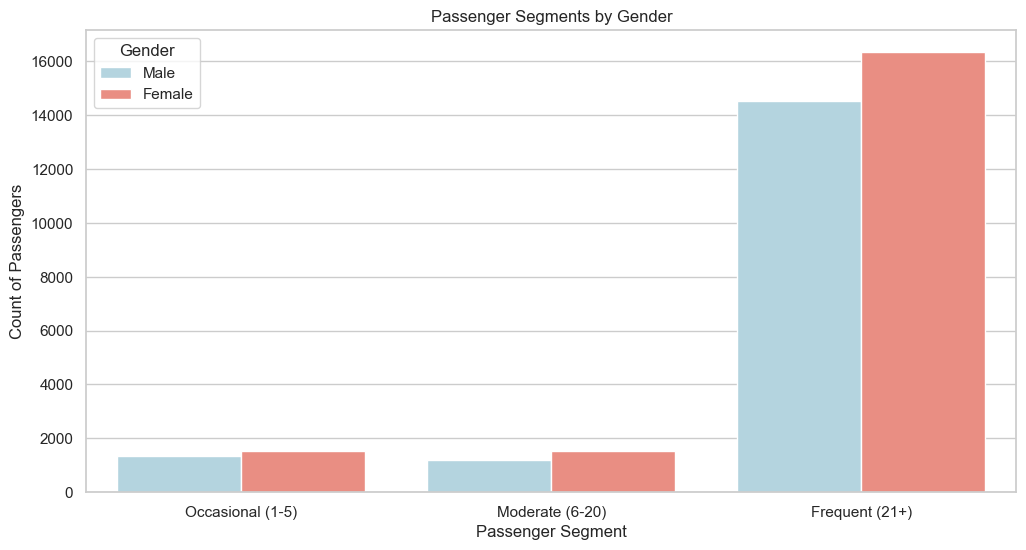

In [58]:
# Calculate trip count per user
trip_counts = df.groupby('payCardID').size().reset_index(name='trip_count')

# Merge trip count with original dataframe
df = df.merge(trip_counts, on='payCardID', how='left')

# Define retention segments based on trip counts
df['passenger_segment'] = pd.cut(
    df['trip_count'],
    bins=[0, 5, 20, df['trip_count'].max()],
    labels=['Occasional (1-5)', 'Moderate (6-20)', 'Frequent (21+)']
)

# Plot frequency by gender and age group
plt.figure(figsize=(12, 6))
sns.countplot(x='passenger_segment', hue='payCardSex', data=df, palette=['lightblue','salmon'])

plt.title("Passenger Segments by Gender")
plt.xlabel("Passenger Segment")
plt.ylabel("Count of Passengers")
plt.legend(title='Gender', labels=['Male', 'Female'])
plt.show()

>**Insights**
>- Female passengers consistently outnumber male passengers across all three segments categorized by frequency of TransJakarta usage.
>- The segment of frequent (with 21+ trips) has the highest number of passengers, highlighting a strong and loyal user base that regularly utilizes the Transjakarta services.

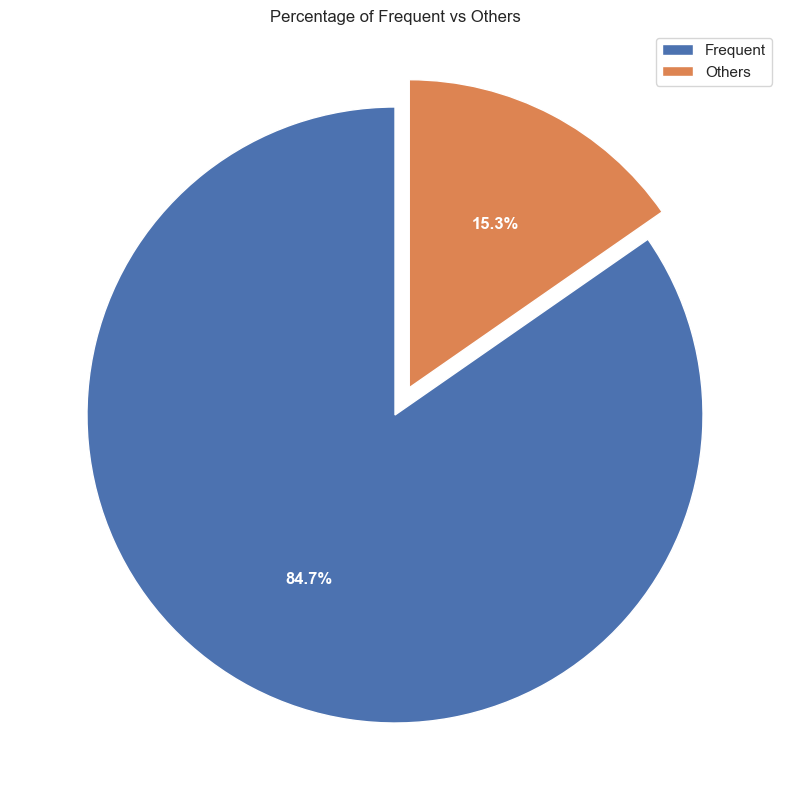

In [59]:
# Separate the 'Frequent' segment and combine the rest as 'Others'
frequent_count = df['passenger_segment'].value_counts()['Frequent (21+)']
others_count = df['passenger_segment'].value_counts().drop('Frequent (21+)').sum()

# Create labels and data for the pie chart
labels = ['Frequent', 'Others']
sizes = [frequent_count, others_count]

# Plot the pie chart
plt.figure(figsize=(10, 10))
plt.pie(sizes, autopct='%1.1f%%', startangle=90,explode=[0,0.1],textprops={'color': 'white', 'weight': 'bold'})
plt.title('Percentage of Frequent vs Others')
plt.legend(labels=['Frequent','Others'])
plt.show()

>**Insights**
>- The frequent users (21+ trips) exhibit the same pattern as occasional users (1-5 trips) based on ranking in total passengers by age: the first is adults, followed by middle-aged individuals, teens, and seniors.
>- Frequent users (21+ trips) make up 84.7% of total passengers, indicating that passengers find TransJakarta services convenient and reliable, leading them to use it frequently.


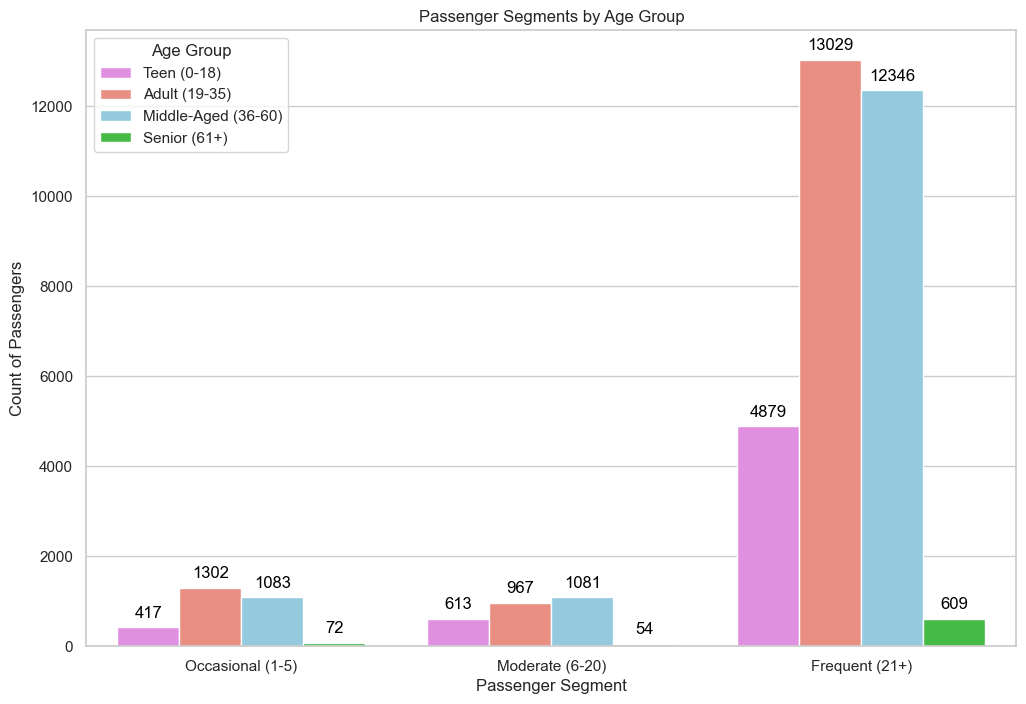

In [60]:
# Age group classification
df['age_group'] = pd.cut(df['Age'], bins=[0, 18, 35, 60, 100], labels=['Teen', 'Adult', 'Middle-aged', 'Senior'])

plt.figure(figsize=(12, 8))
ax= sns.countplot(x='passenger_segment', hue='age_group', data=df, palette=['violet','salmon','skyblue','limegreen'])

# Annotate the total number of passengers on each bar
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(p.get_height())}', 
            (p.get_x() + p.get_width() / 2., p.get_height()), 
            ha='center', va='bottom', color='black', 
            xytext=(0, 5),
            textcoords='offset points')
    
plt.title("Passenger Segments by Age Group")
plt.xlabel("Passenger Segment")
plt.ylabel("Count of Passengers")
plt.legend(title='Age Group',labels= ['Teen (0-18)','Adult (19-35)','Middle-Aged (36-60)','Senior (61+)'])
plt.show()

>**Insights**
>- The adult age group has the highest frequency of trips (21+ trips). This suggests that people in this productive age tend to work and need to commute using public transportation.
>- The total number of senior individuals using TransJakarta frequently is higher than those in the occasional and moderate segments. This shows that TransJakarta services are convenient for seniors.

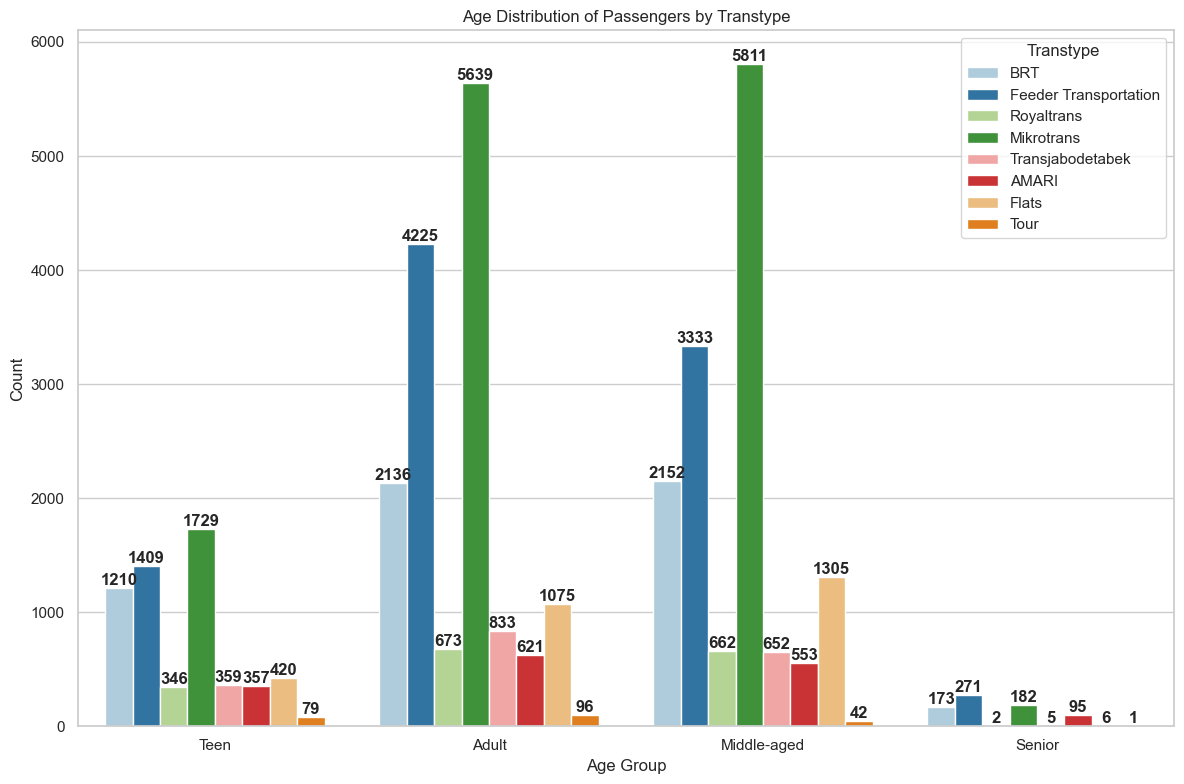

In [61]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(data=df, x='age_group', hue='Transtype', palette='Paired')

for container in ax.containers:
    ax.bar_label(container, fontweight='heavy')

plt.title('Age Distribution of Passengers by Transtype')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Transtype')
plt.tight_layout()
plt.show()

**Senior Use Case**

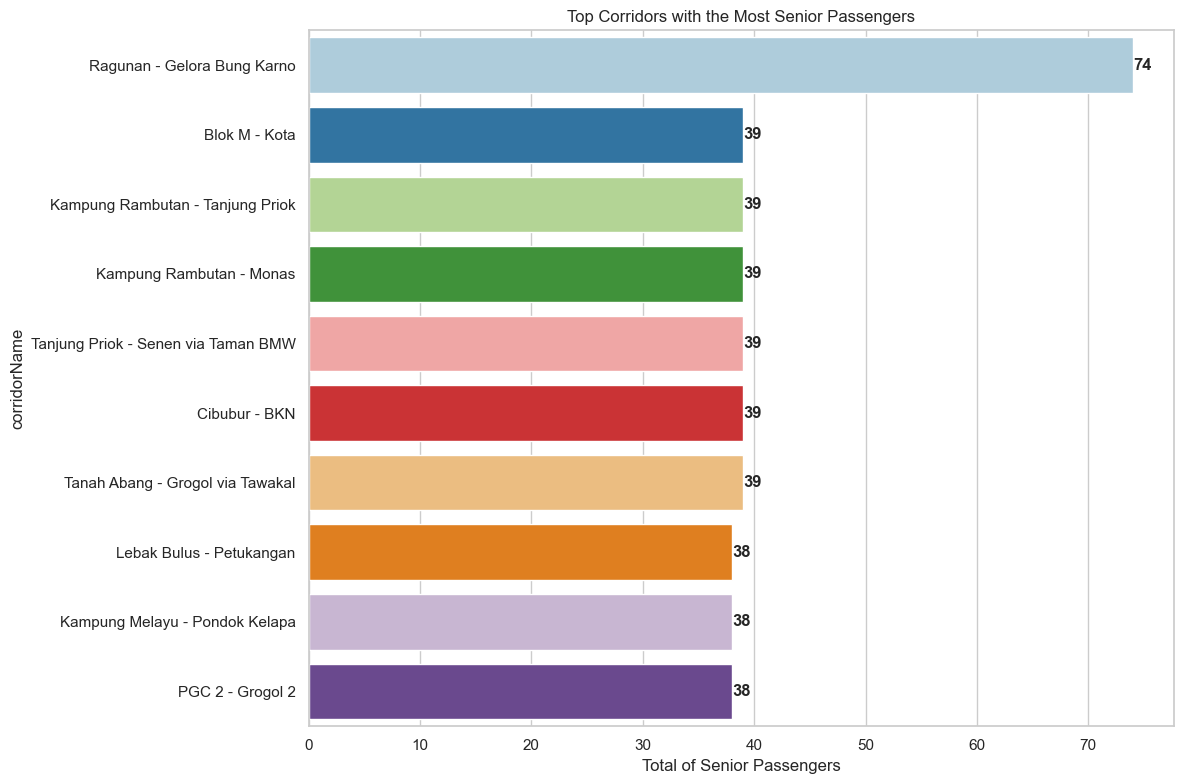

In [62]:
senior_passengers = df[df['age_group'] == 'Senior']

corridor_counts = senior_passengers['corridorName'].value_counts()

top_corridors = corridor_counts.head(10)

plt.figure(figsize=(12, 8))
ax=sns.barplot(y=top_corridors.index, x=top_corridors.values,hue=top_corridors.index, palette='Paired')

for container in ax.containers:
    ax.bar_label(container, fontweight='heavy')

plt.title('Top Corridors with the Most Senior Passengers')
plt.xlabel('Total of Senior Passengers')
plt.tight_layout()
plt.show()

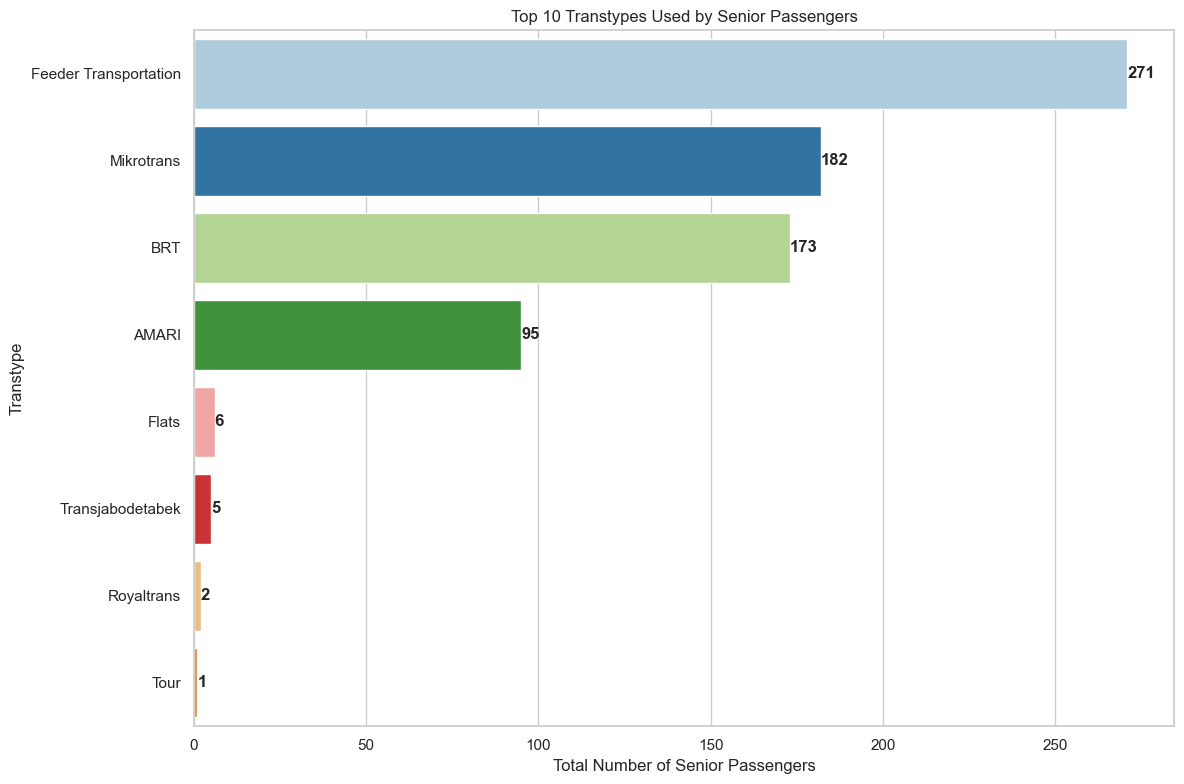

In [63]:
transtype_counts = senior_passengers['Transtype'].value_counts()

top_transtypes = transtype_counts.head(10)

plt.figure(figsize=(12, 8))
ax = sns.barplot(y=top_transtypes.index, x=top_transtypes.values, hue=top_transtypes.index, palette='Paired')

for container in ax.containers:
    ax.bar_label(container, fontweight='heavy')

plt.title('Top 10 Transtypes Used by Senior Passengers')
plt.xlabel('Total Number of Senior Passengers')
plt.tight_layout()
plt.show()

>## Insights
>- The **Ragunan - Gelora Bung Karno BRT corridor** has the highest number of senior passengers, with **74**.
>- Seniors mainly use **Feeder Transportation**, **Mikrotrans**, and **BRT services**.


------

## **Analysis of Top 5 Busiest TransJakarta Corridors**

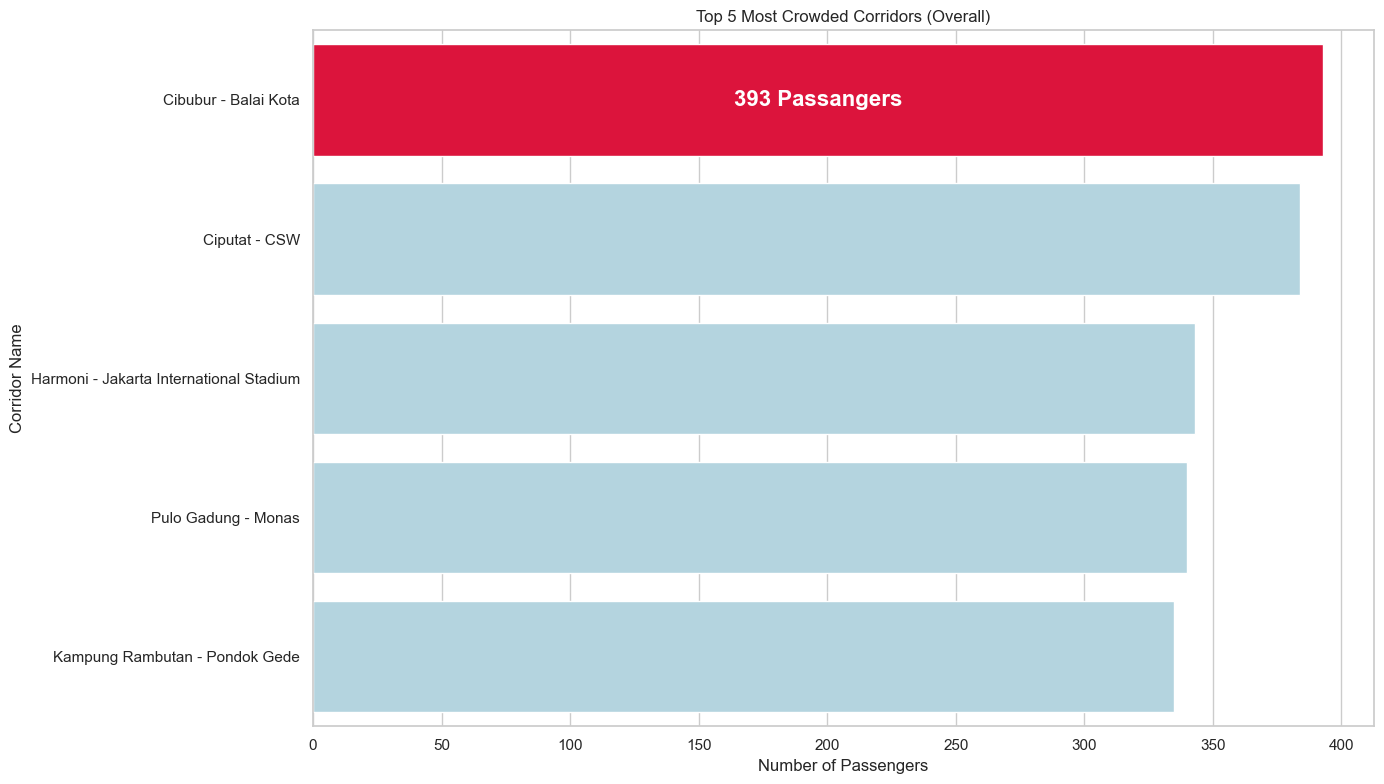

In [64]:
# Group data by 'corridorName' to get passenger counts without direction
corridor_counts = df.groupby('corridorName').size().reset_index(name='pass_count')

# Get the top 5 most crowded corridors
top_corridors = corridor_counts.nlargest(5, 'pass_count')

# Plot the top 5 crowded corridors
plt.figure(figsize=(14, 8))
bar_plot = sns.barplot(data=top_corridors, y='corridorName', x='pass_count', color='lightblue')

# Highlight the highest bar
max_bar = top_corridors['pass_count'].max()
for index, row in enumerate(top_corridors.itertuples()):
    if row.pass_count == max_bar:
        bar_plot.patches[index].set_facecolor('crimson')
        # Add passenger count number in the center of the highest bar
        bar_plot.text(row.pass_count / 2, index, f'{row.pass_count} Passangers', color='White', ha='center', va='center',
                      fontweight='heavy',fontsize=16)

plt.title("Top 5 Most Crowded Corridors (Overall)")
plt.xlabel("Number of Passengers")
plt.ylabel("Corridor Name")
plt.tight_layout()
plt.show()

>**Insights**
>- The most crowded corridor is **Cibubur - Balai Kota** with a total of 393 passengers during April 2023.
>- This is followed by other corridors: **Ciputat - CSW**, **Harmoni Jakarta International Stadium**, **Pulo Gadung - Monas**, and **Kampung Rambutan - Pondok Gede**.


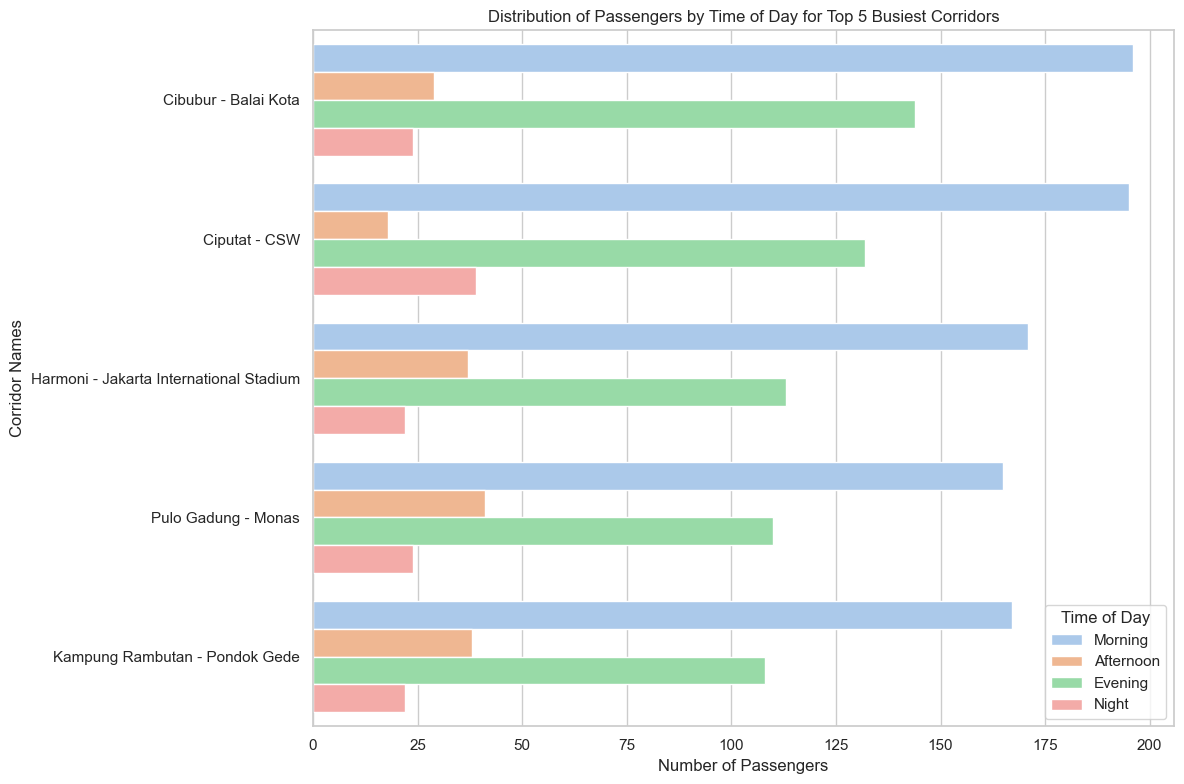

In [65]:
# Count the number of passengers per corridor
corridor_counts = df['corridorName'].value_counts().reset_index(name='pass_count')
corridor_counts.columns = ['corridorName', 'pass_count']  # Rename columns for clarity

# Get the top 5 busiest corridors
top_5_corridors = corridor_counts.nlargest(5, 'pass_count')['corridorName'].tolist()

# Filter the DataFrame for the top 5 corridors
top_5_corridor_data = df[df['corridorName'].isin(top_5_corridors)]

# Plot the distribution of passengers by time of day for the top 5 busiest corridors
plt.figure(figsize=(12, 8))
sns.countplot(data=top_5_corridor_data, y='corridorName', hue='time_of_day', palette='pastel', order=top_5_corridors)
plt.title('Distribution of Passengers by Time of Day for Top 5 Busiest Corridors')
plt.xlabel('Number of Passengers')
plt.ylabel('Corridor Names')
plt.legend(title='Time of Day', loc='best')
plt.tight_layout()
plt.show()


>**Insights**
>- The top 5 busiest corridors see the highest passenger traffic in the morning, with a secondary peak in the evening, aligning with typical commuting hours as people travel to and from work.

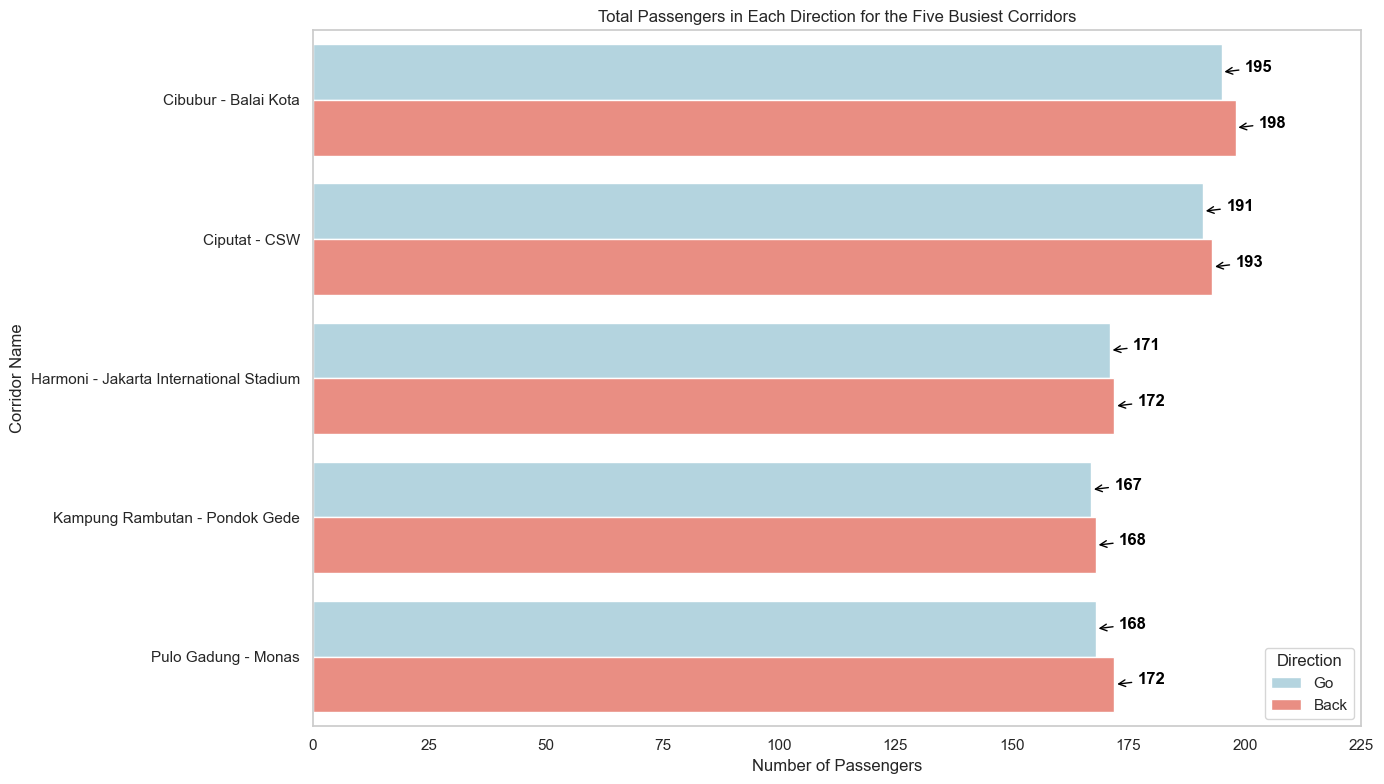

In [66]:
# Group data by 'corridorName' and 'direction' to get passengers counts
lane_direction_counts = df.groupby(['corridorName', 'direction']).size().reset_index(name='pass_count')

# Now consider the direction for the top 5 corridors
top_lanes = lane_direction_counts[lane_direction_counts['corridorName'].isin(top_corridors['corridorName'])]

# Create the bar plot for top 5 corridors by direction
palette = {0: 'lightblue', 1: 'salmon'}

plt.figure(figsize=(14, 8))
sns.barplot(data=top_lanes, y='corridorName', x='pass_count', hue='direction', palette=palette)
plt.title("Total Passengers in Each Direction for the Five Busiest Corridors")
plt.xlabel("Number of Passengers")
plt.ylabel("Corridor Name")

# Update legend with clear labels
direction_labels = {0: 'Go', 1: 'Back'}
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles, labels=[direction_labels[int(label)] for label in labels], title="Direction", loc='lower right')

# Highlight the highest value
max_pass_count = top_lanes['pass_count'].tolist()

# Annotate the bars corresponding to max_pass_count
for bar in plt.gca().patches:
    if bar.get_width() in max_pass_count:
        plt.annotate(f'{bar.get_width():.0f}', 
                     xy=(bar.get_width(), bar.get_y() + bar.get_height() / 2),
                     xytext=(bar.get_width() + 5, bar.get_y() + bar.get_height() / 2),
                     arrowprops=dict(arrowstyle='->', color='black'),
                     color='black', fontweight='heavy')

plt.xticks(np.arange(0,226,25))
plt.tight_layout()
plt.grid(False)
plt.show()

>**Insights**
>- As we can see the top 5 corridor, every corridor have slightly difference total trips for each direction, It shows that people are using these corridors frequently for commuting in both direction.


---

## **PayCard Analysis**

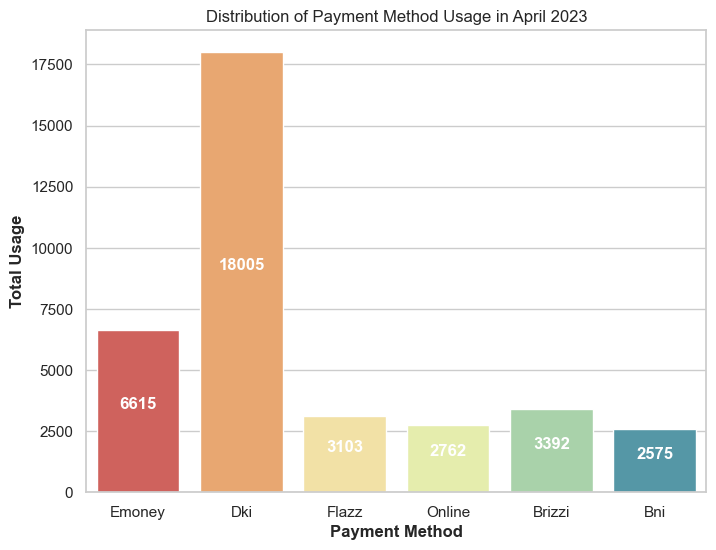

In [67]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x="payCardBank", hue="payCardBank",palette='Spectral')
plt.title("Distribution of Payment Method Usage in April 2023")
plt.xlabel("Payment Method",fontweight = 'bold')
plt.ylabel("Total Usage",fontweight = 'bold')
plt.yticks(np.arange(0, 18000, 2500))

ax.set_xticks(list(range(0, len(df['payCardBank'].unique()))))
ax.set_xticklabels([label.get_text().capitalize() for label in ax.get_xticklabels()])


for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2, p.get_height()/2), 
                ha = 'center', va = 'center', 
                xytext = (0, 5), 
                textcoords = 'offset points',fontweight='heavy', color='white')

plt.show()

>**Insights**
>- The most commonly used payment method is **Dki**, with total of 18,005 transactions.

---

## **Revenue Distribution Analysis Across Transaction Types**

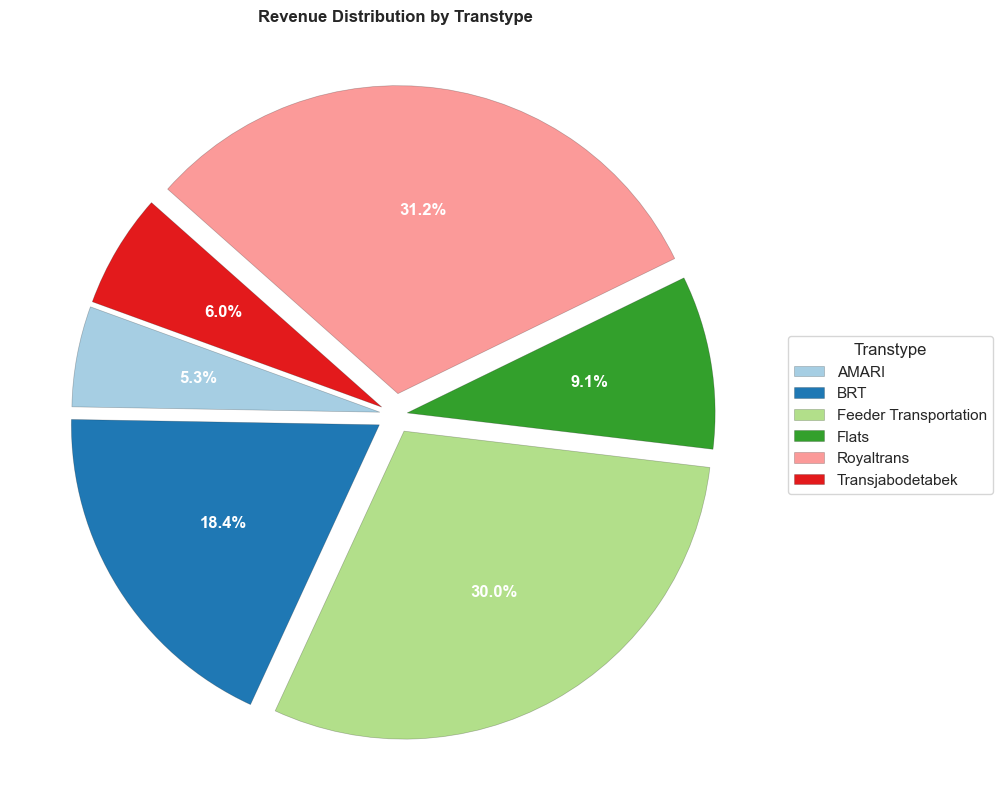

In [68]:
# Create filtered_df without modifying the original df
filtered_df = df[df['payAmount'] > 0]

# Calculate total revenue for each Transtype
revenue_summary = filtered_df.groupby('Transtype')['payAmount'].sum().reset_index(name='total_revenue')

# Define explode values to highlight each Transtype slice (adjust values if needed)
explode = [0.05,0.06,0.06,0.04,0.07,0.05]

# Plotting the pie chart without side labels and using a legend instead
plt.figure(figsize=(10, 10))
wedges, _, autotexts = plt.pie(
    revenue_summary['total_revenue'],
    autopct='%1.1f%%',
    startangle=160,
    explode=explode,
    colors=plt.cm.Paired.colors,
    wedgeprops={'edgecolor': (0, 0, 0, 0.25), 'linewidth': 0.5},
)

# Add a legend with Transtype labels
plt.legend(
    wedges, revenue_summary['Transtype'],
    title="Transtype",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

# Customizing text properties for percentage labels
for autotext in autotexts:
    autotext.set_color("white")
    autotext.set_fontweight("heavy")

# Set the title
plt.title('Revenue Distribution by Transtype',fontweight='heavy')
plt.show()


>**Insights**
>- **RoyalTrans** generates the highest revenue for TransJakarta, accounting for **31.2%** of total revenue, due to its highest fare of **Rp. 20,000** per trip.
>- Other transportation types, including **Feeder Transportation**, **BRT**, **Flats**, **Transjabodetabek**, and **AMARI**, have a base fare of **Rp. 3,500** per trip.
>- Revenue ranking of transportation types for TransJakarta: 
>   1. **RoyalTrans**
>   2. **Feeder Transportation**
>   3. **BRT**
>   4. **Flats**
>   5. **Transjabodetabek**
>   6. **AMARI**
>- **Mikrotrans** and **Tour** transportation types are free and therefore excluded from total revenue calculations.



----

## **Analysis of Non-TapOut Passengers**

In [69]:
non_tapOut = pd.DataFrame(non_tapOut)
non_tapOut['Age'] = 2023 - non_tapOut['payCardBirthDate']
non_tapOut['age_group'] = pd.cut(non_tapOut['Age'], bins=[0, 18, 35, 60, 100], labels=['Teen', 'Adult', 'Middle-aged', 'Senior'])

In [70]:
non_tapOut['Transtype'] = non_tapOut['corridorID'].apply(categorize_transtype)

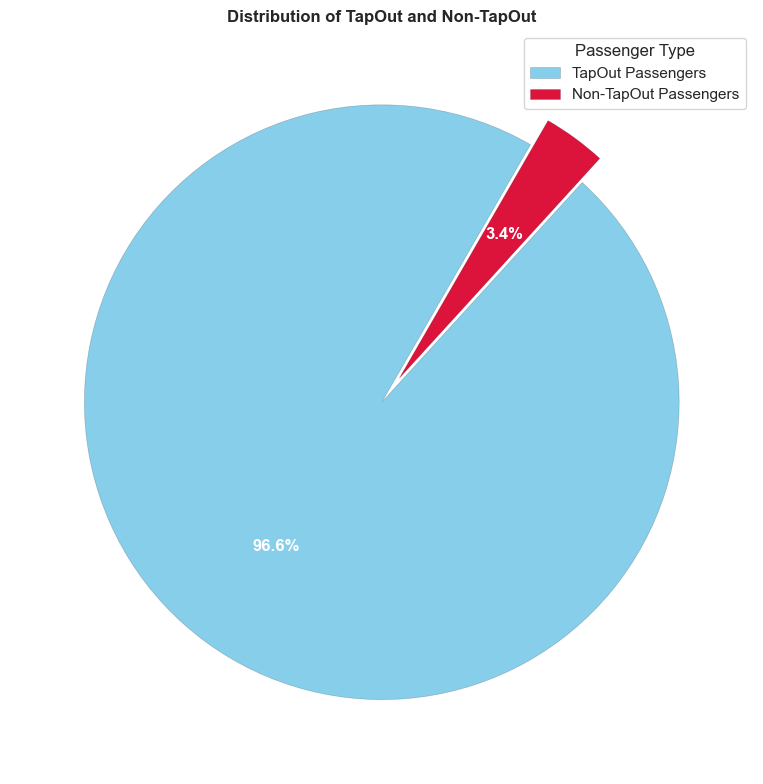

In [71]:
# Calculate totals
total_df = df.shape[0]  # Total count of entries in df
total_non_tapOut = non_tapOut.shape[0]  # Total count of entries in non_tapOut

# Create a DataFrame for plotting
total_data = pd.DataFrame({
    'TypePassenger': ['TapOut Passengers', 'Non-TapOut Passengers'],
    'Total Count': [total_df, total_non_tapOut]
})

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(total_data['Total Count'],
        autopct='%1.1f%%',
        startangle=60,
        colors=['skyblue','crimson'],
        explode=[0, 0.1],
        textprops=dict(color='white', fontweight='heavy'),
        wedgeprops={'edgecolor': (0, 0, 0, 0.2), 'linewidth': 0.5},
        )

# Equal aspect ratio ensures that pie chart is circular
plt.title("Distribution of TapOut and Non-TapOut", fontweight='heavy')
plt.legend(total_data['TypePassenger'], title="Passenger Type")
plt.tight_layout()
plt.show()

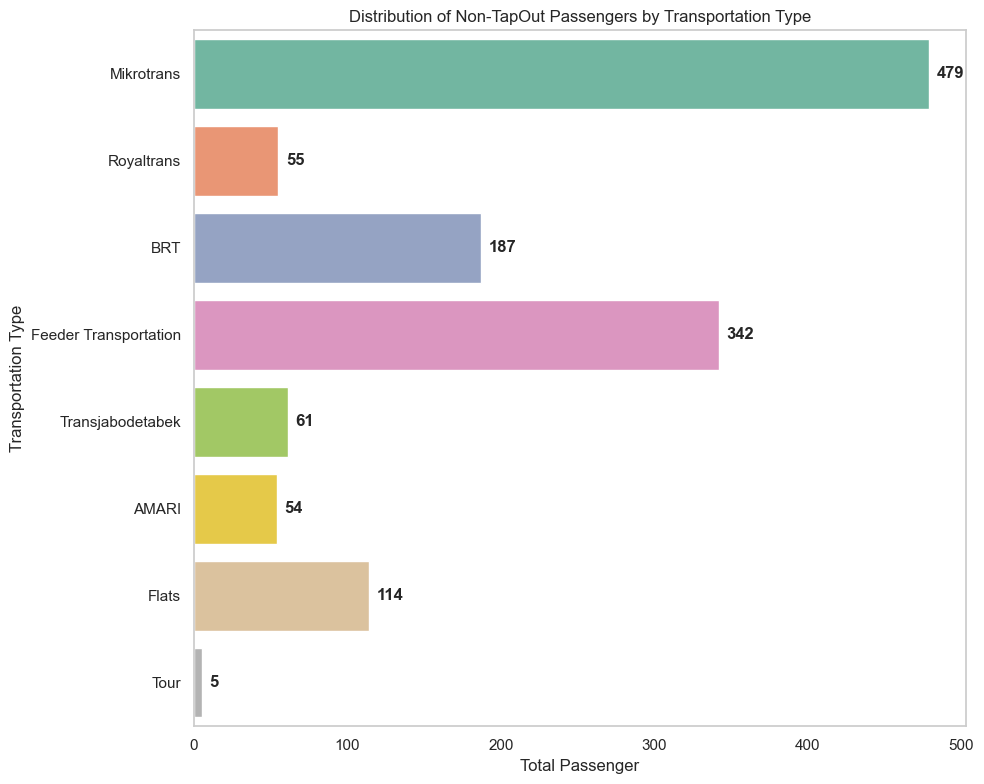

In [72]:
plt.figure(figsize=(10, 8))
ax = sns.countplot(data=non_tapOut, y='Transtype',hue='Transtype',palette='Set2')

# Add labels to the right side of each bar
for p in ax.patches:
    ax.text(p.get_width() + 5,
        p.get_y() + p.get_height() / 2,
        f'{int(p.get_width())}',
        va='center',
        fontweight= 'heavy')

plt.title("Distribution of Non-TapOut Passengers by Transportation Type")
plt.xlabel("Total Passenger")
plt.ylabel("Transportation Type")
plt.xticks(np.arange(0,501,100))
plt.tight_layout()
plt.grid(False)
plt.show()

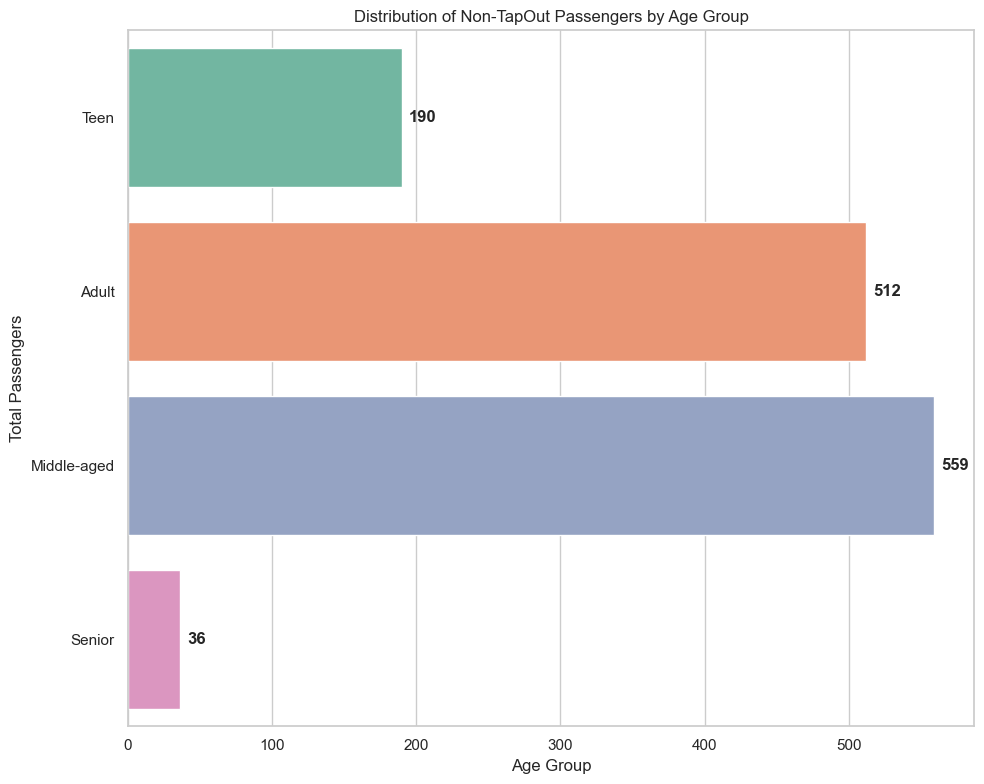

In [73]:
plt.figure(figsize=(10, 8))
ax = sns.countplot(data=non_tapOut, y='age_group', hue='age_group',palette='Set2')

# Iterate through the patches to add text above each bar
for p in ax.patches:
    ax.text(p.get_width() + 5,
        p.get_y() + p.get_height() / 2,
        f'{int(p.get_width())}',
        va='center',
        fontweight= 'heavy')

plt.title("Distribution of Non-TapOut Passengers by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Total Passengers")
plt.tight_layout()
plt.show()

>**Insights**
>- In April 2023, `3.4%` of passengers forgot to tap out after riding TransJakarta.
>- Most of tap-out forgetfulness occurs with `Mikrotrans` services.
>- As we can see from the third graph above, Middle-aged people are more likely to forget to tapOut than younger people.

---

## **Distribution of Travel Duration Experienced by Passengers**

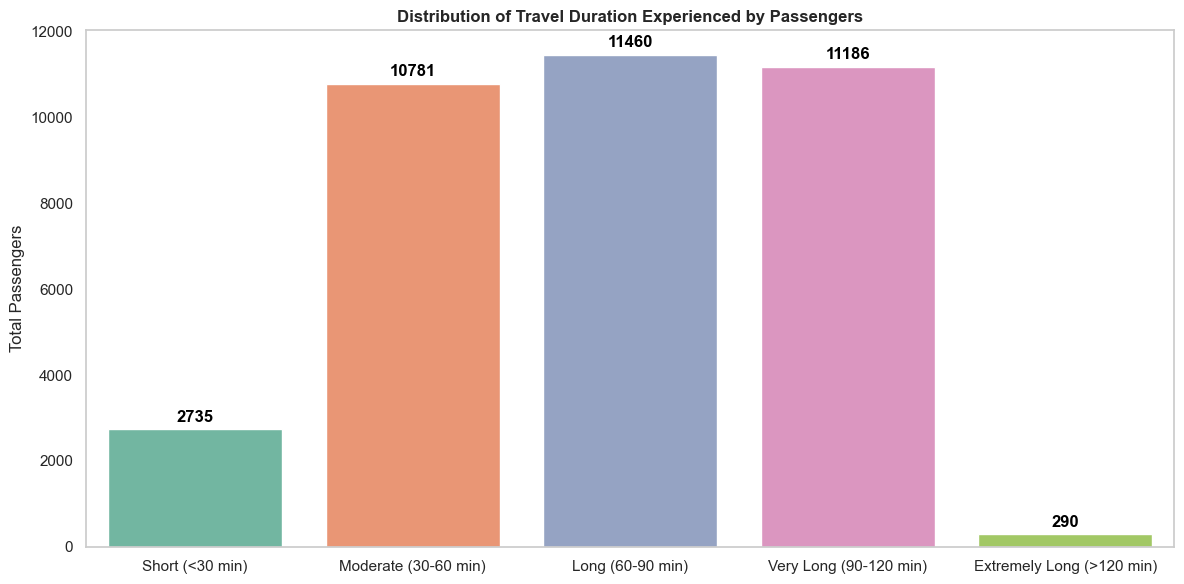

In [74]:
# Define the bins and labels
bins = [0, 30, 60, 90, 120, float('inf')]
labels = ['Short (<30 min)', 'Moderate (30-60 min)', 'Long (60-90 min)', 'Very Long (90-120 min)', 'Extremely Long (>120 min)']

# Create the travel_duration_bin column
df['travel_duration_group'] = pd.cut(df['travelDuration'], bins=bins, labels=labels, right=False)

# Plot the total passengers in each category
plt.figure(figsize=(12, 6))
ax= sns.countplot(data=df, x='travel_duration_group', hue='travel_duration_group', palette="Set2")

# Annotate the total number of passengers on each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()-50), 
                ha='center', va='bottom', 
                fontweight='heavy', color='black', 
                xytext=(0, 5),
                textcoords='offset points')

plt.title('Distribution of Travel Duration Experienced by Passengers',fontweight='heavy')
plt.xlabel('')
plt.ylabel('Total Passengers')
plt.grid(False)
plt.tight_layout()

plt.show()

>**Insights**
>- The travel duration for TransJakarta is mostly between 60 and 90 minutes.

---

In [75]:
df.to_csv('Transjakarta_cleaned.csv')

In [76]:
non_tapOut.to_csv('nontapout.csv')

# Recommendation Actions

**Question**: How can TransJakarta adjust service frequency during peak and off-peak hours to alleviate overcrowding and optimize operational costs?
>**For Overcrowding**
>- **Increase service frequency around 06:00 and 17:00** to accommodate high passenger demand during peak hours. This will help alleviate overcrowding, reduce wait times, and improve the passenger experience.
>- **Reduce service frequency between 09:00 and 16:00** when demand is lower. This adjustment can help lower operational costs without compromising service quality.

**Question**: How can TransJakarta increase awareness about tapping out and use social media to encourage adult and middle-aged passengers to adopt this practice?
>**For Non-Tap-Out Cases**
>- **Launch awareness campaigns** to educate passengers on the importance of tapping out. Use targeted messaging through posters, signs, and announcements inside vehicles to remind passengers to tap out before exiting.
>- **Create short, engaging video content** to boost awareness of the need to tap out. Focus on adult and middle-aged passengers by sharing these videos on social media platforms (e.g., Instagram, Facebook) where they are most active. Emphasize how tapping out contributes to more efficient service, benefiting all riders.

**Question**: How can TransJakarta improve peak-hour services for adult and middle-aged passengers while ensuring better priority seating for senior passengers?
>**For Passenger Segmentation by Age**
>- Since **adults and middle-aged** passengers are the primary users during peak commuting hours, TransJakarta should focus on ensuring that peak-hour services are reliable, efficient, and frequent to meet their needs.
>- For **senior passengers**, especially in Feeder Transportation and BRT services, particularly on the **Ragunan - Gelora Bung Karno BRT corridor**, more **priority seating** should be made available.

**Question**: How can TransJakarta maintain high service standards and reliability to retain its loyal frequent passengers?
>**For Passenger Segmentation by Usage**
>- With **84.7% of passengers being frequent users**, maintaining high service standards and reliability is crucial. This will not only help retain these loyal customers but also encourage continued use of TransJakarta services.


# Conclusion

- **Alleviating Overcrowding**:
  >- Increase service frequency around 06:00 and 17:00 to accommodate peak-hour demand.
  >- Reduce service frequency between 09:00 and 16:00 to optimize operational costs.

- **Encouraging Tap-Out Awareness**:
  >- Launch awareness campaigns, including posters, signs, and announcements to educate passengers on the importance of tapping out.
  >- Use social media platforms (e.g., Instagram, Facebook) to share engaging video content targeted at adult and middle-aged passengers.

- **Improving High-Demand Services for Each Age Group**:
  >- Ensure reliable, frequent services during peak hours for adults and middle-aged passengers.
  >- Ensure sufficient priority seating for senior passengers on Feeder and BRT services, particularly on the Ragunan - Gelora Bung Karno BRT corridor.

- **Retaining Loyal Passengers**:
  >- Maintain high service standards and reliability to retain frequent users, who make up 84.7% of passengers.
